Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [34]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [36]:
#read the data
data=pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


#### data are given with TransactionEncoder so we drop V1,V2,V3,V4 and V5 which is not required

In [37]:
data1=data.copy()
data1=data1.drop(['V1', 'V2', 'V3', 'V4', 'V5'],axis=1)
data1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [38]:
data1.sum()

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [39]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [40]:
count = data1.sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [41]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


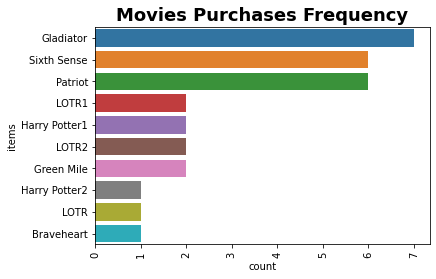

In [42]:
#visualization of movies data
pal = sns.color_palette("pastel")
count = count.sort_values(by='count', ascending=False)
sns.barplot(x=count['count'], y=count['items'])
plt.xticks(rotation = 90, fontsize = 10) 
plt.title('Movies Purchases Frequency',  fontsize = 18, fontweight = 'bold')
plt.show()

#### As we show that Gladiator, sixth sense and patriot are purchases by most 

## Implementation of Apriori Algorithem

In [43]:
# finding support and length for itemsets with minimum support of 0.1 
frequent_itemsets = apriori(data1, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


### At minimum support of 0.1 we obtained 5-item itemset

In [44]:
# Finding confidence for rules obtained with minimum support of 0.1
conf=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=n)
    rules.sort_values('lift',ascending=False)
    lift=rules[rules.lift>=1]
    print('No. of rules with confidence ',n,'is',rules['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf.append(rules)

No. of rules with confidence  0.3 is 217 and no. of lift for those rules with ratio>=1 is 211
No. of rules with confidence  0.4 is 216 and no. of lift for those rules with ratio>=1 is 210
No. of rules with confidence  0.5 is 216 and no. of lift for those rules with ratio>=1 is 210
No. of rules with confidence  0.6 is 134 and no. of lift for those rules with ratio>=1 is 134
No. of rules with confidence  0.7 is 129 and no. of lift for those rules with ratio>=1 is 129
No. of rules with confidence  0.8 is 128 and no. of lift for those rules with ratio>=1 is 128
No. of rules with confidence  0.9 is 125 and no. of lift for those rules with ratio>=1 is 125
No. of rules with confidence  1 is 125 and no. of lift for those rules with ratio>=1 is 125


### By applying different confidence on minimum support 0.1 we find that rules for confidence 0.4 and 0.5 are same also rules for confident 0.9 and 1 are same and when we set lift ratio >=1 we find that rules are different below confidence 0.6 

In [45]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(LOTR2, Harry Potter1)","(Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [46]:
len(conf)

8

### Visualization of obtained rules

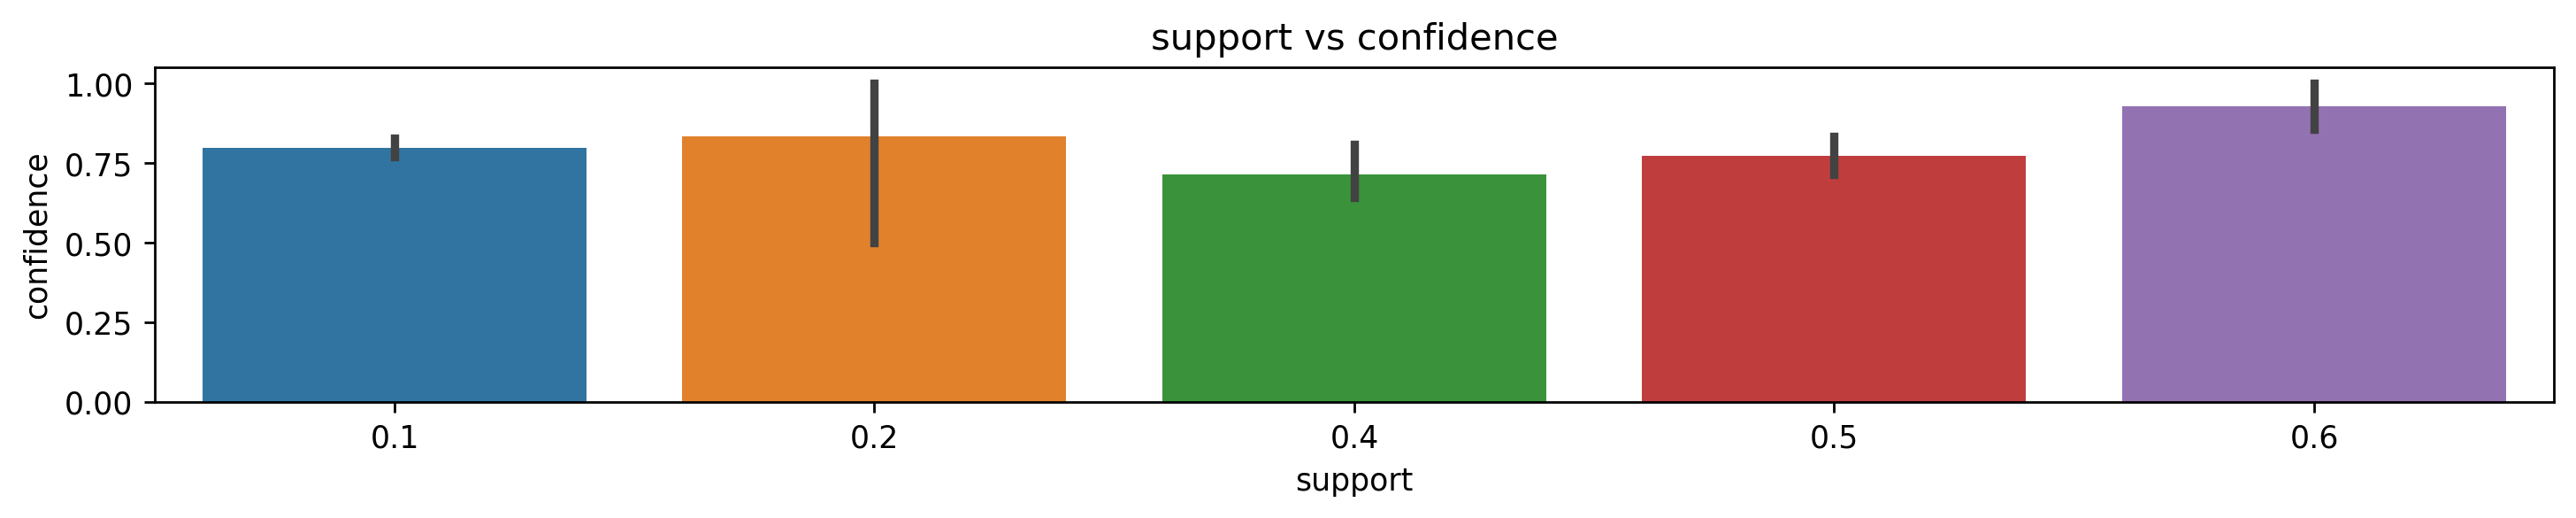

None


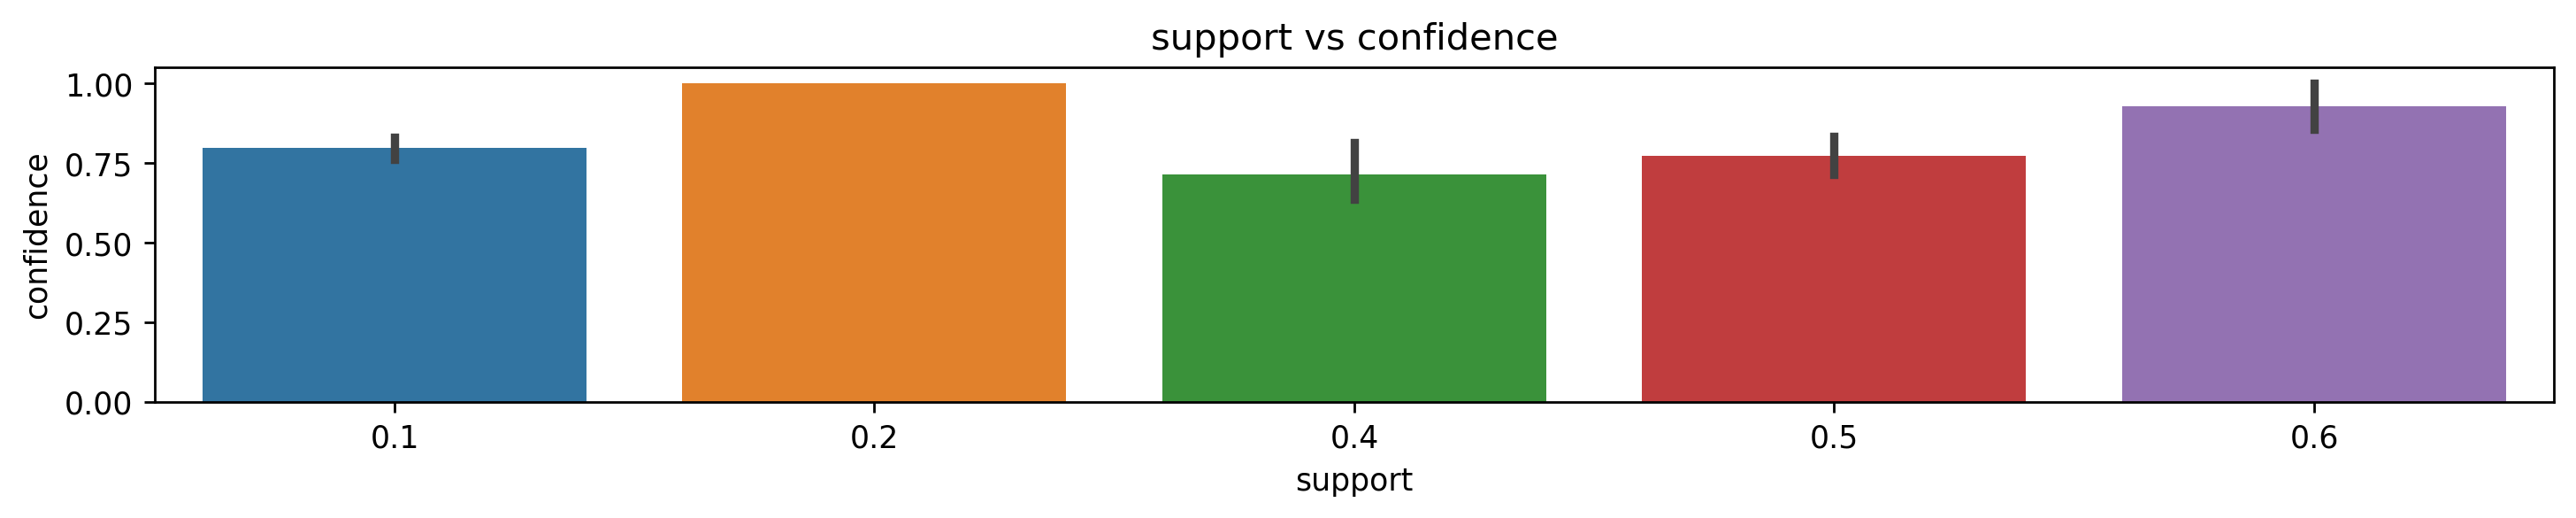

None


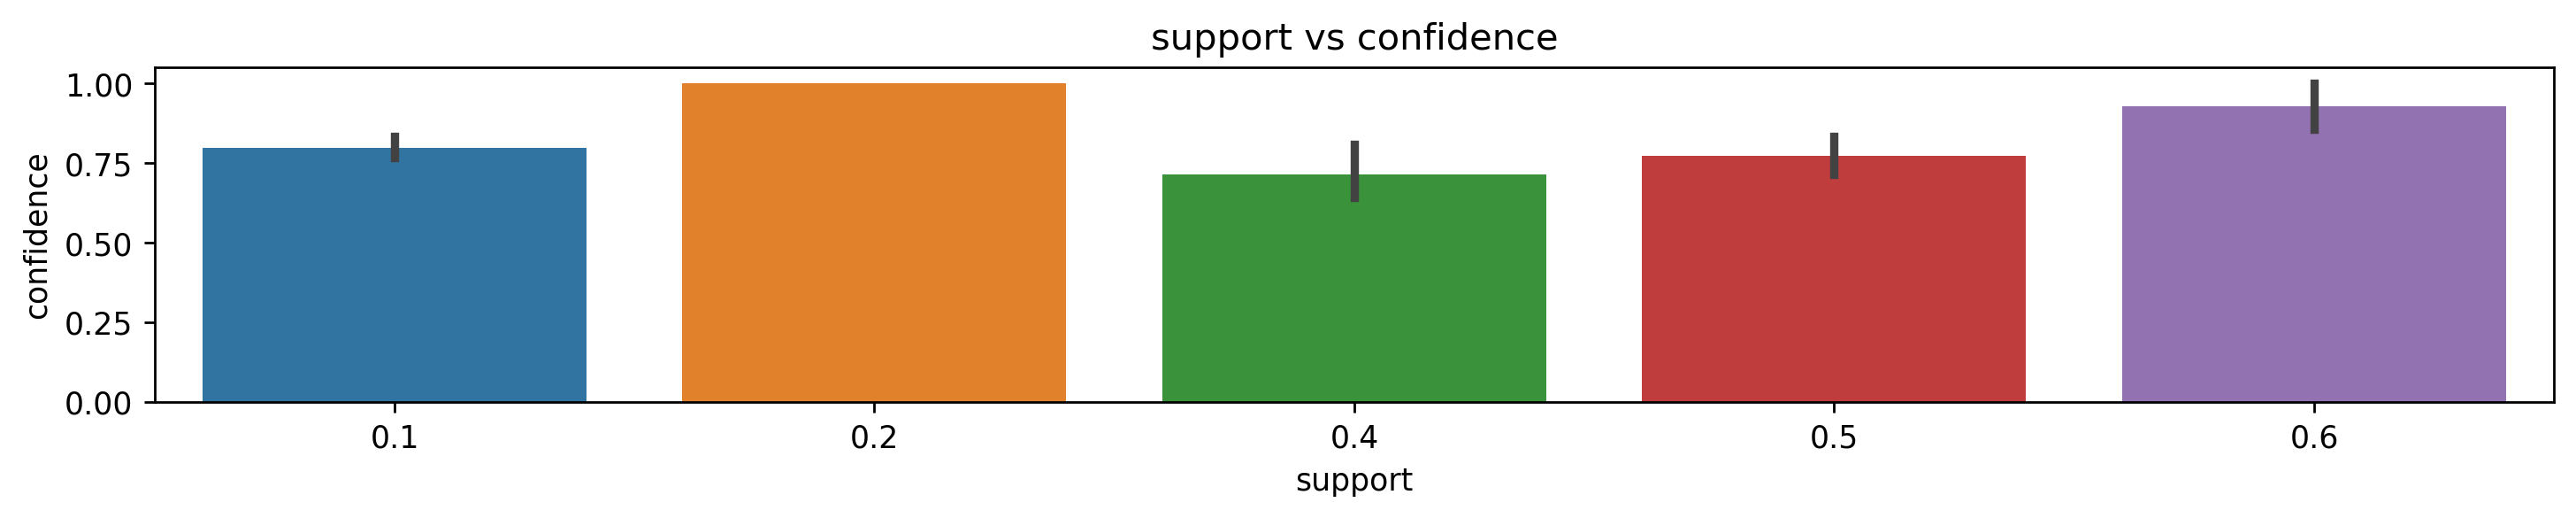

None


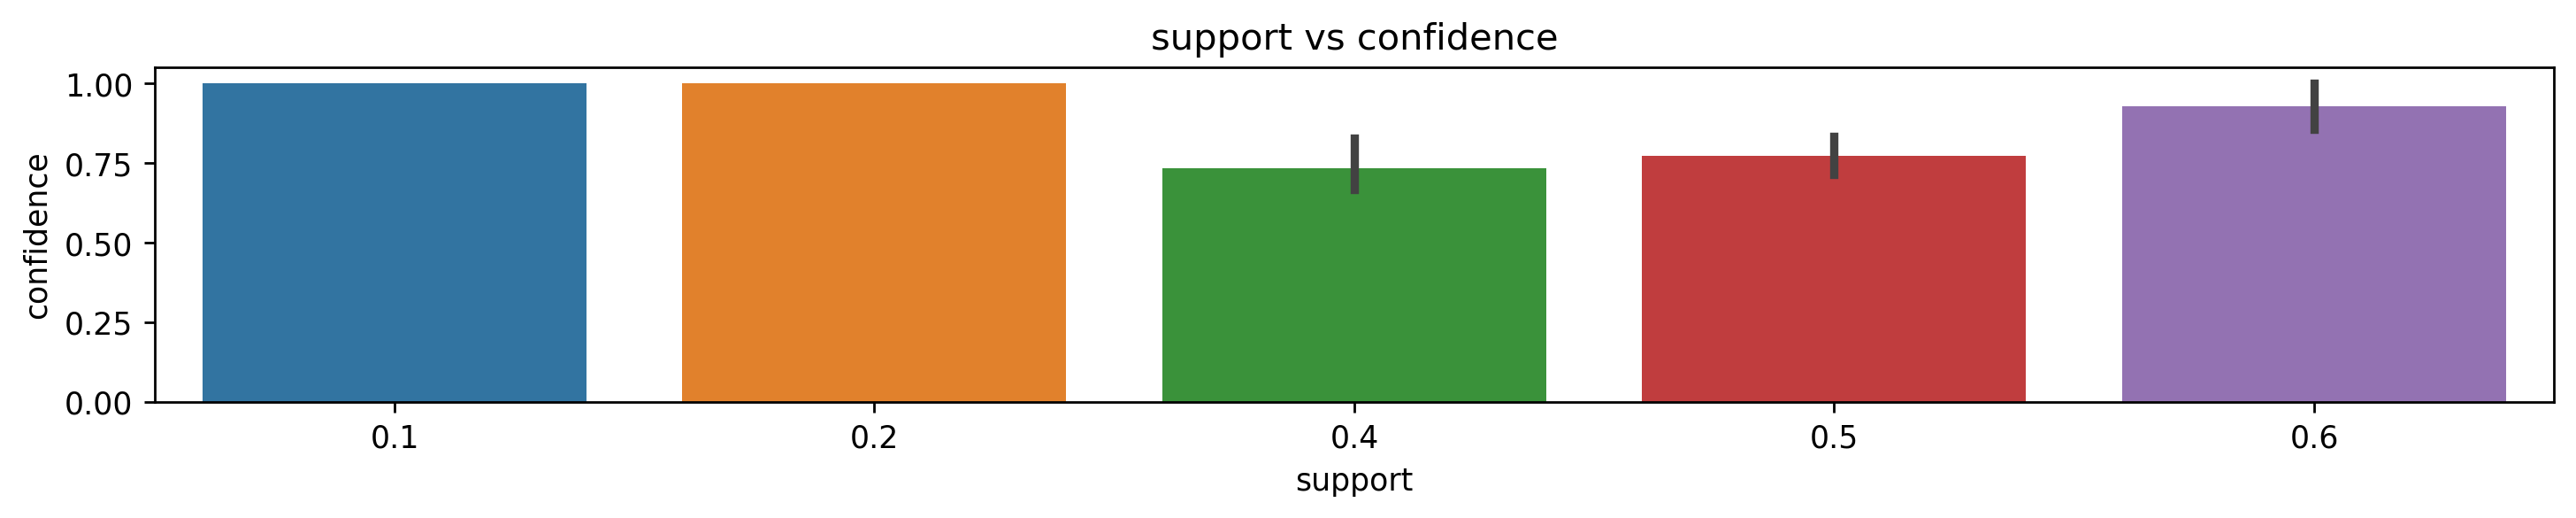

None


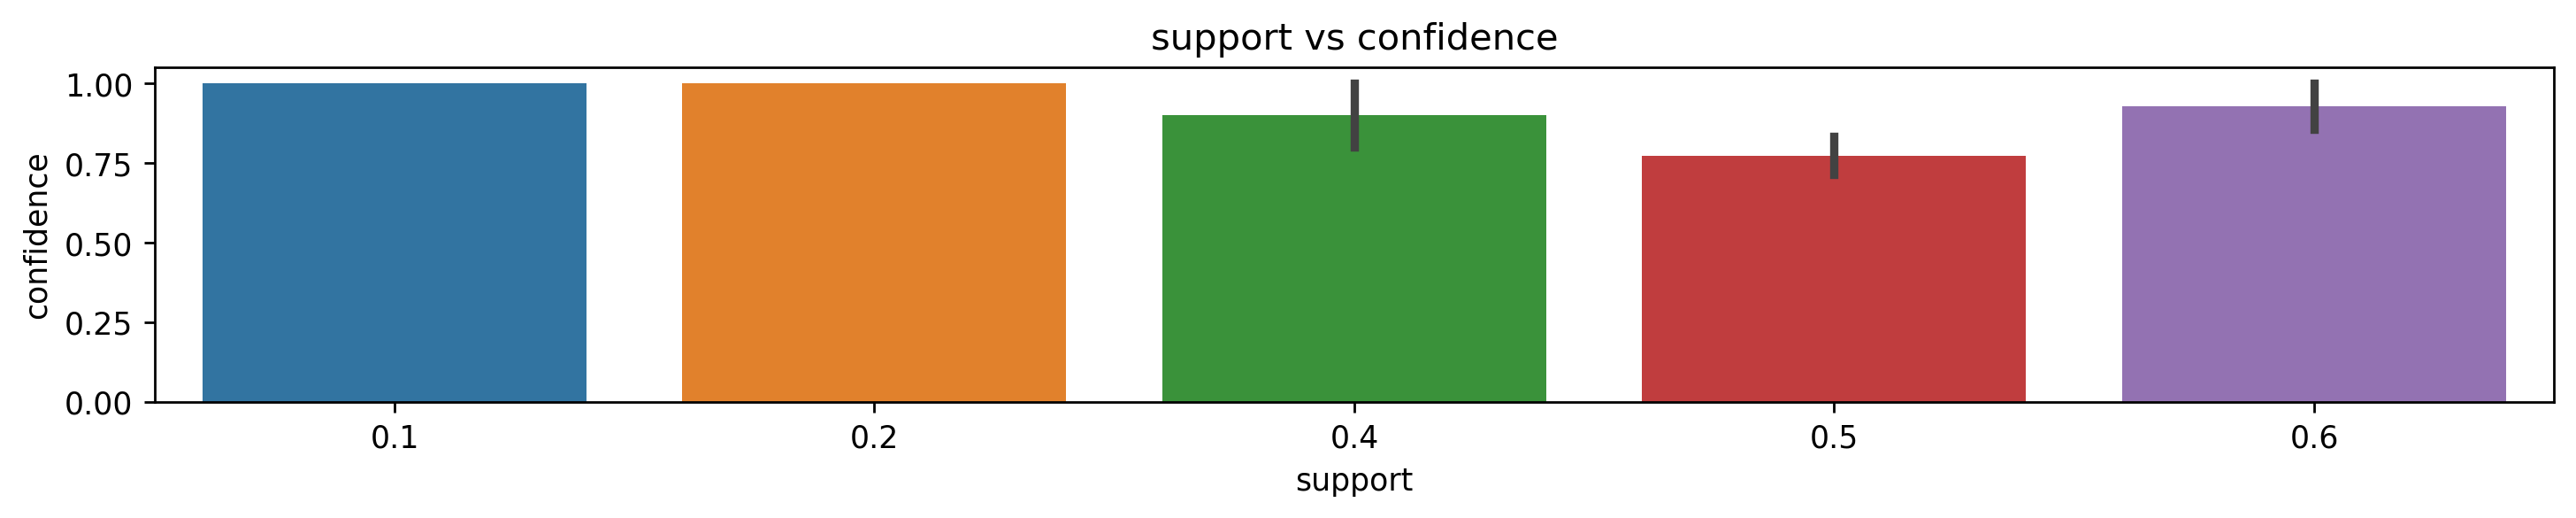

None


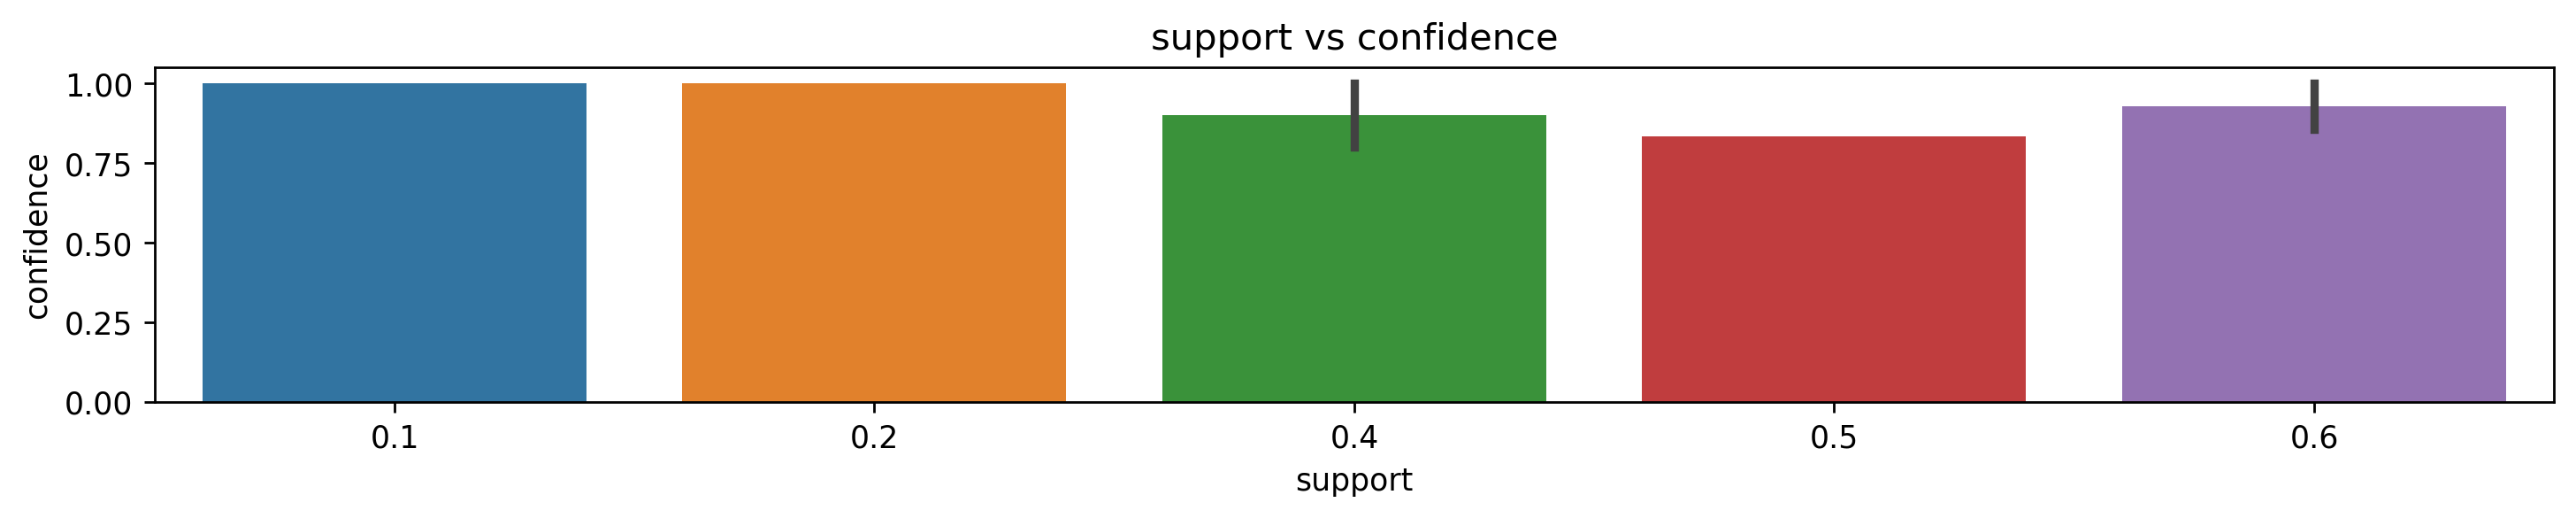

None


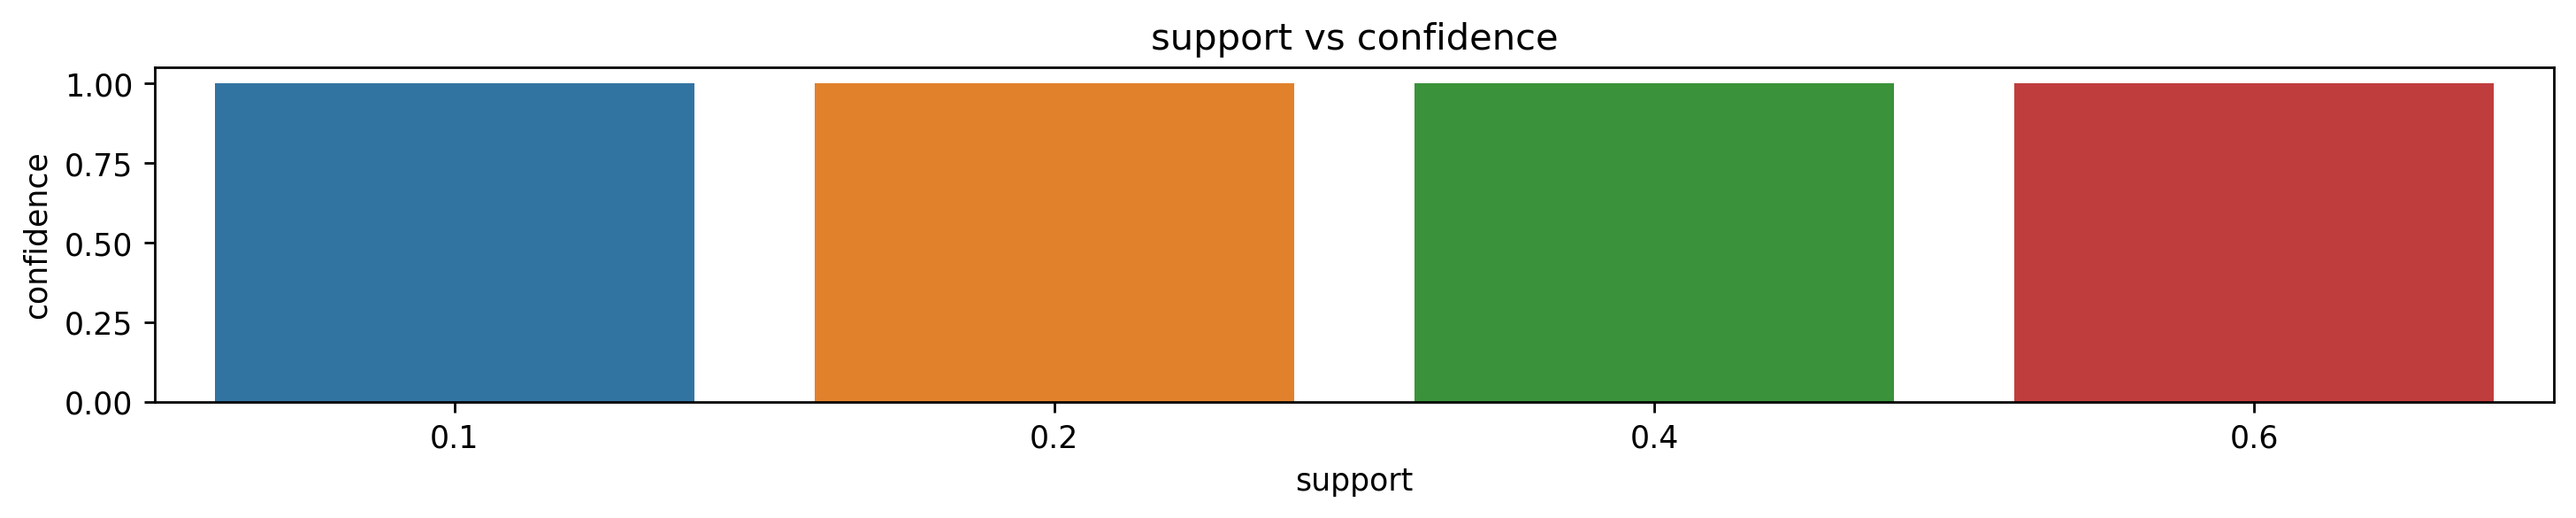

None


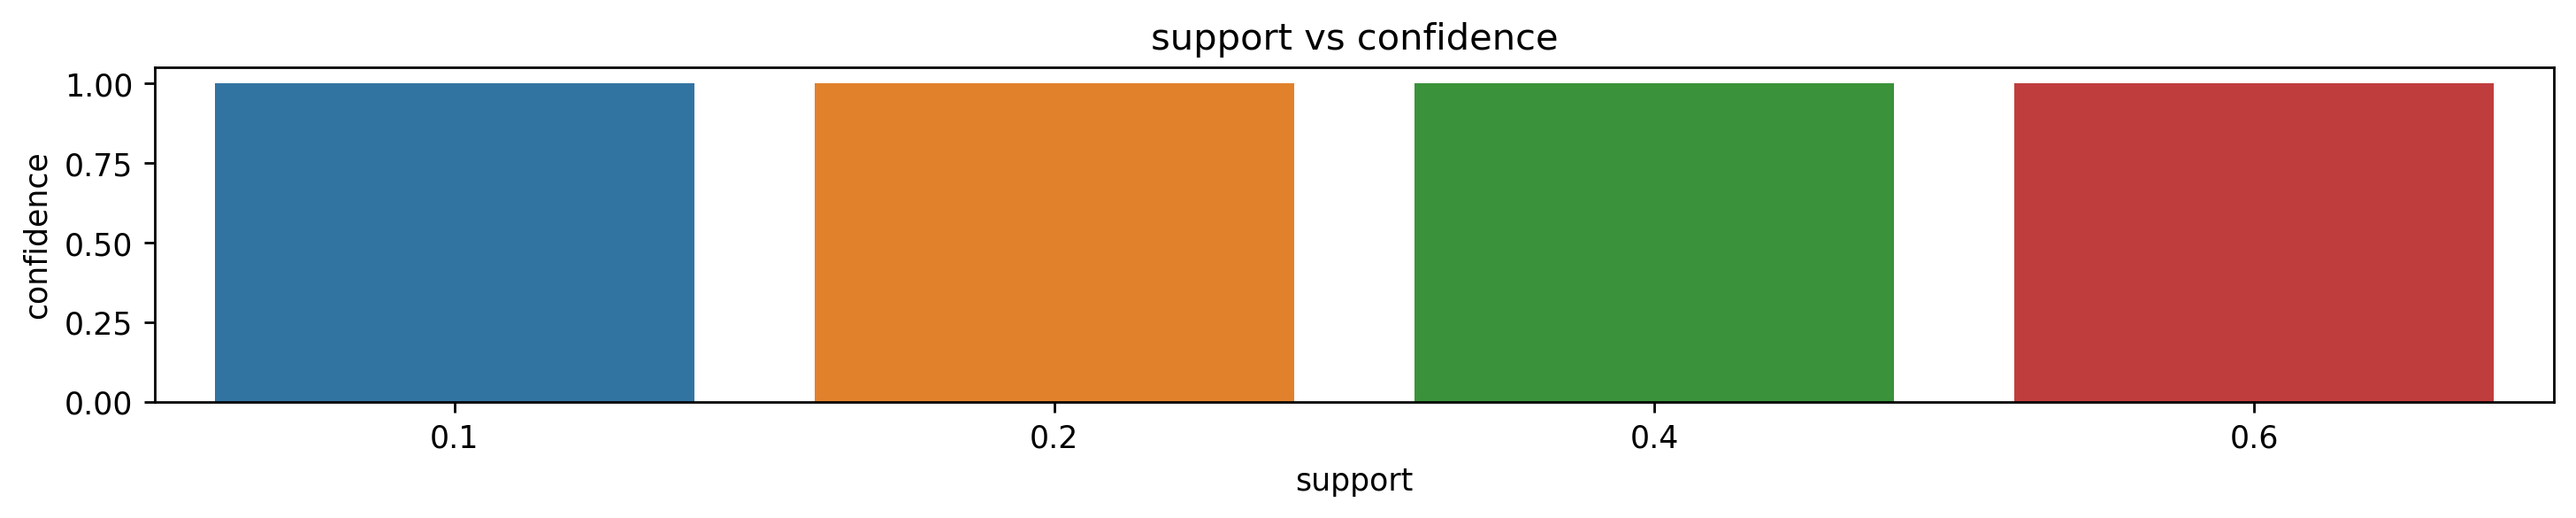

None


In [47]:
# Barplot for confidence vs support
lent=0,1,2,3,4,5,6,7
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf[i])
    plt.title("support vs confidence")
    print(plt.show())

#### By ploting bar graph we observe that when confidence is reach to 1 support have only 4 values the one with 0.5 is gone 

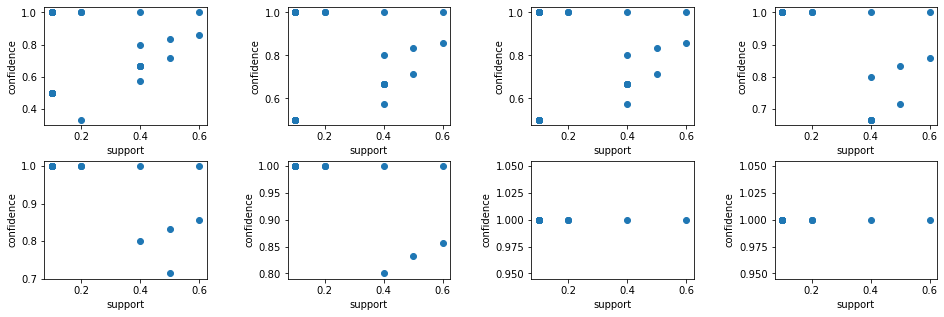

In [48]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes
ax1.scatter(conf[0]['support'],conf[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf[1]['support'],conf[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf[2]['support'],conf[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf[3]['support'],conf[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf[4]['support'],conf[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
ax6.scatter(conf[5]['support'],conf[5]['confidence']),ax6.set_xlabel('support'),ax6.set_ylabel('confidence')
ax7.scatter(conf[6]['support'],conf[6]['confidence']),ax7.set_xlabel('support'),ax7.set_ylabel('confidence')
ax8.scatter(conf[7]['support'],conf[7]['confidence']),ax8.set_xlabel('support'),ax8.set_ylabel('confidence')
plt.show()

### By ploting scatter plot we observe that most of the rules are lie on support 0.4 

(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

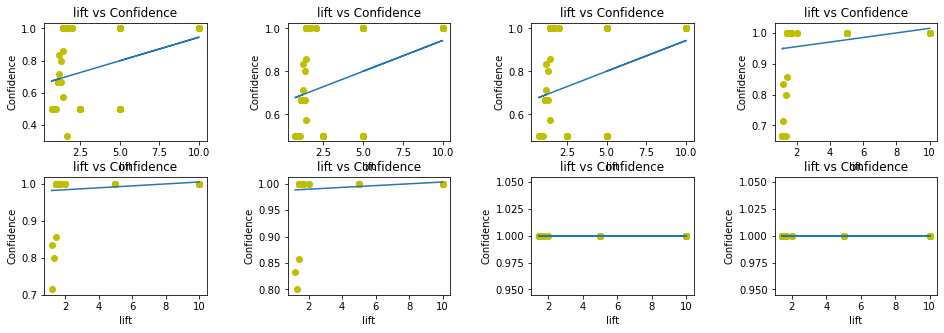

In [49]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes 
fit = np.polyfit(conf[0]['lift'], conf[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf[0]['lift'], conf[0]['confidence'], 'yo', conf[0]['lift'],fit_fn(conf[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf[1]['lift'], conf[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf[1]['lift'], conf[1]['confidence'], 'yo', conf[1]['lift'],fit_fn(conf[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf[2]['lift'], conf[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf[2]['lift'], conf[2]['confidence'], 'yo', conf[2]['lift'],fit_fn(conf[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf[3]['lift'], conf[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf[3]['lift'], conf[3]['confidence'], 'yo', conf[3]['lift'],fit_fn(conf[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf[4]['lift'], conf[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf[4]['lift'], conf[4]['confidence'], 'yo', conf[4]['lift'],fit_fn(conf[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')
fit = np.polyfit(conf[5]['lift'], conf[5]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax6.plot(conf[5]['lift'], conf[5]['confidence'], 'yo', conf[5]['lift'],fit_fn(conf[5]['lift']))
ax6.set_xlabel('lift'),ax6.set_ylabel('Confidence'),ax6.set_title('lift vs Confidence')
fit = np.polyfit(conf[6]['lift'], conf[6]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax7.plot(conf[6]['lift'], conf[6]['confidence'], 'yo', conf[6]['lift'],fit_fn(conf[6]['lift']))
ax7.set_xlabel('lift'),ax7.set_ylabel('Confidence'),ax7.set_title('lift vs Confidence')
fit = np.polyfit(conf[7]['lift'], conf[7]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax8.plot(conf[7]['lift'], conf[7]['confidence'], 'yo', conf[7]['lift'],fit_fn(conf[7]['lift']))
ax8.set_xlabel('lift'),ax8.set_ylabel('Confidence'),ax8.set_title('lift vs Confidence')

In [50]:
# finding support and length for itemsets with minimum support of 0.2 
frequent_itemsets1=apriori(data1,min_support=0.2,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


### At minimum support of 0.2 we obtained 3-item itemset

In [51]:
# Finding confidence for rules obtained with minimum support of 0.2
conf1=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules1 = association_rules(frequent_itemsets1,metric='confidence', min_threshold=n)
    rules1.sort_values('lift',ascending=False)
    lift=rules1[rules1.lift>=1]
    print('No. of rules with confidence ',n,'is',rules1['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf1.append(rules1)

No. of rules with confidence  0.3 is 16 and no. of lift for those rules with ratio>=1 is 16
No. of rules with confidence  0.4 is 15 and no. of lift for those rules with ratio>=1 is 15
No. of rules with confidence  0.5 is 15 and no. of lift for those rules with ratio>=1 is 15
No. of rules with confidence  0.6 is 14 and no. of lift for those rules with ratio>=1 is 14
No. of rules with confidence  0.7 is 9 and no. of lift for those rules with ratio>=1 is 9
No. of rules with confidence  0.8 is 8 and no. of lift for those rules with ratio>=1 is 8
No. of rules with confidence  0.9 is 5 and no. of lift for those rules with ratio>=1 is 5
No. of rules with confidence  1 is 5 and no. of lift for those rules with ratio>=1 is 5


In [52]:
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf


### By applying different confidence on minimum support 0.1 we find that rules for confidence 0.4 and 0.5 are same also rules for confident 0.9 and 1 are same and when we set lift ratio >=1 we find that rules are same as confidence.  

In [53]:
len(conf1)

8

## Visualization of obtained rules

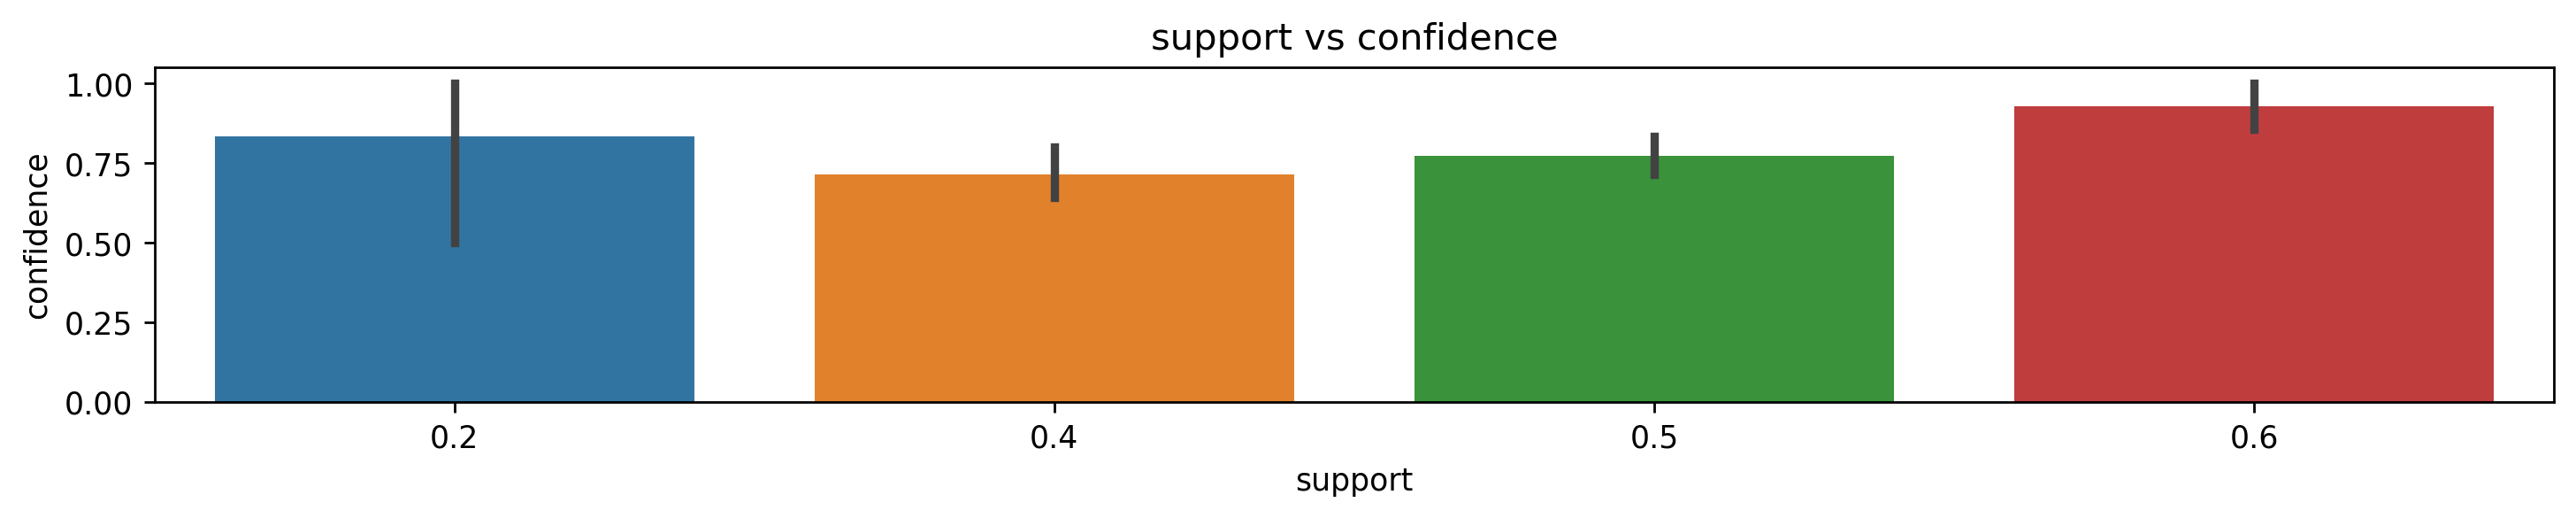

None


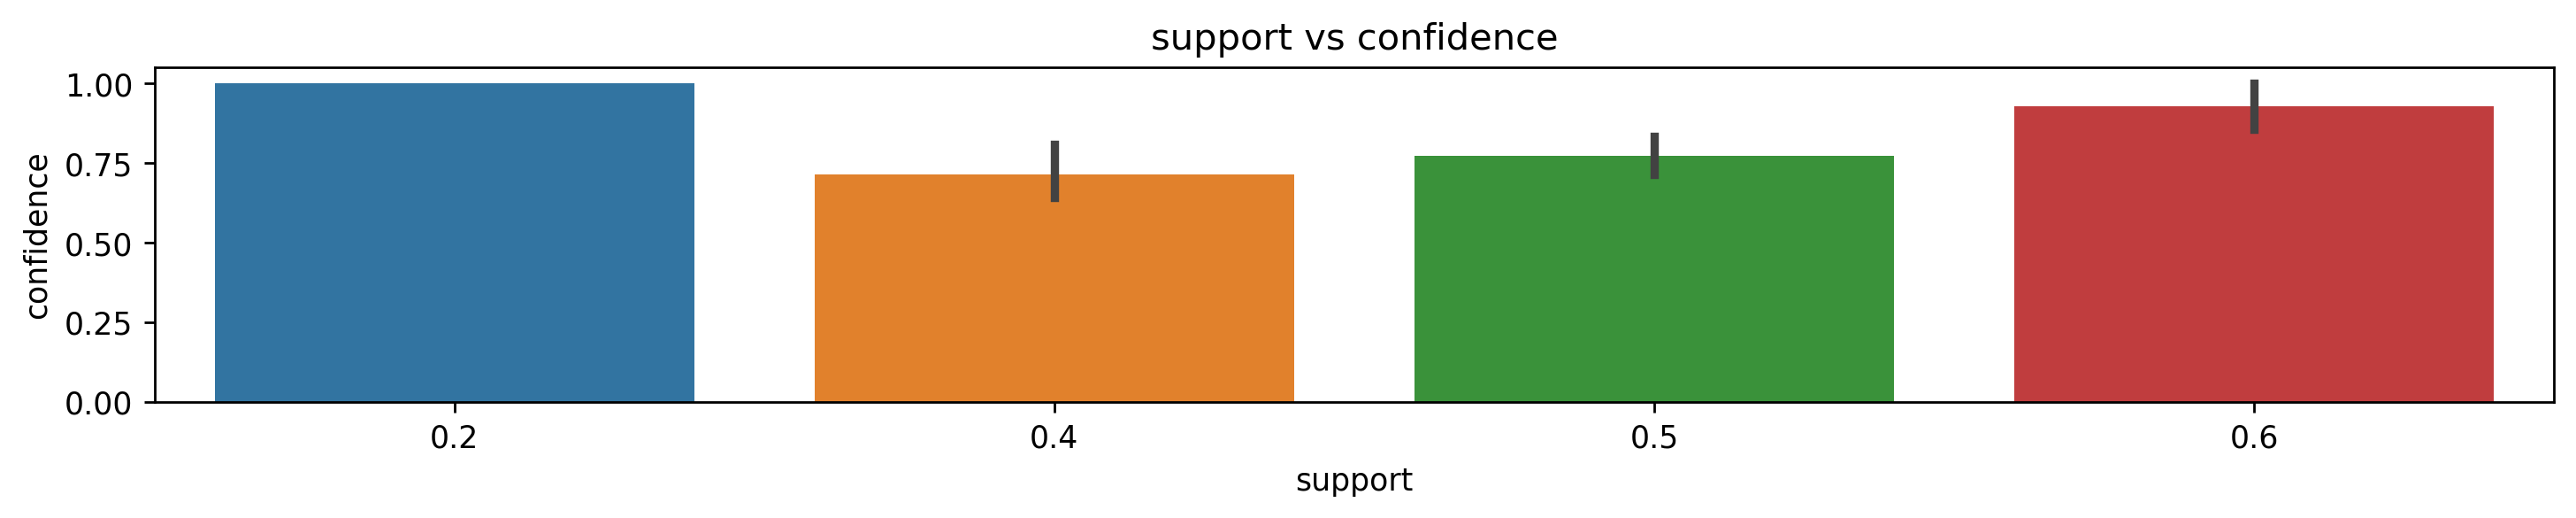

None


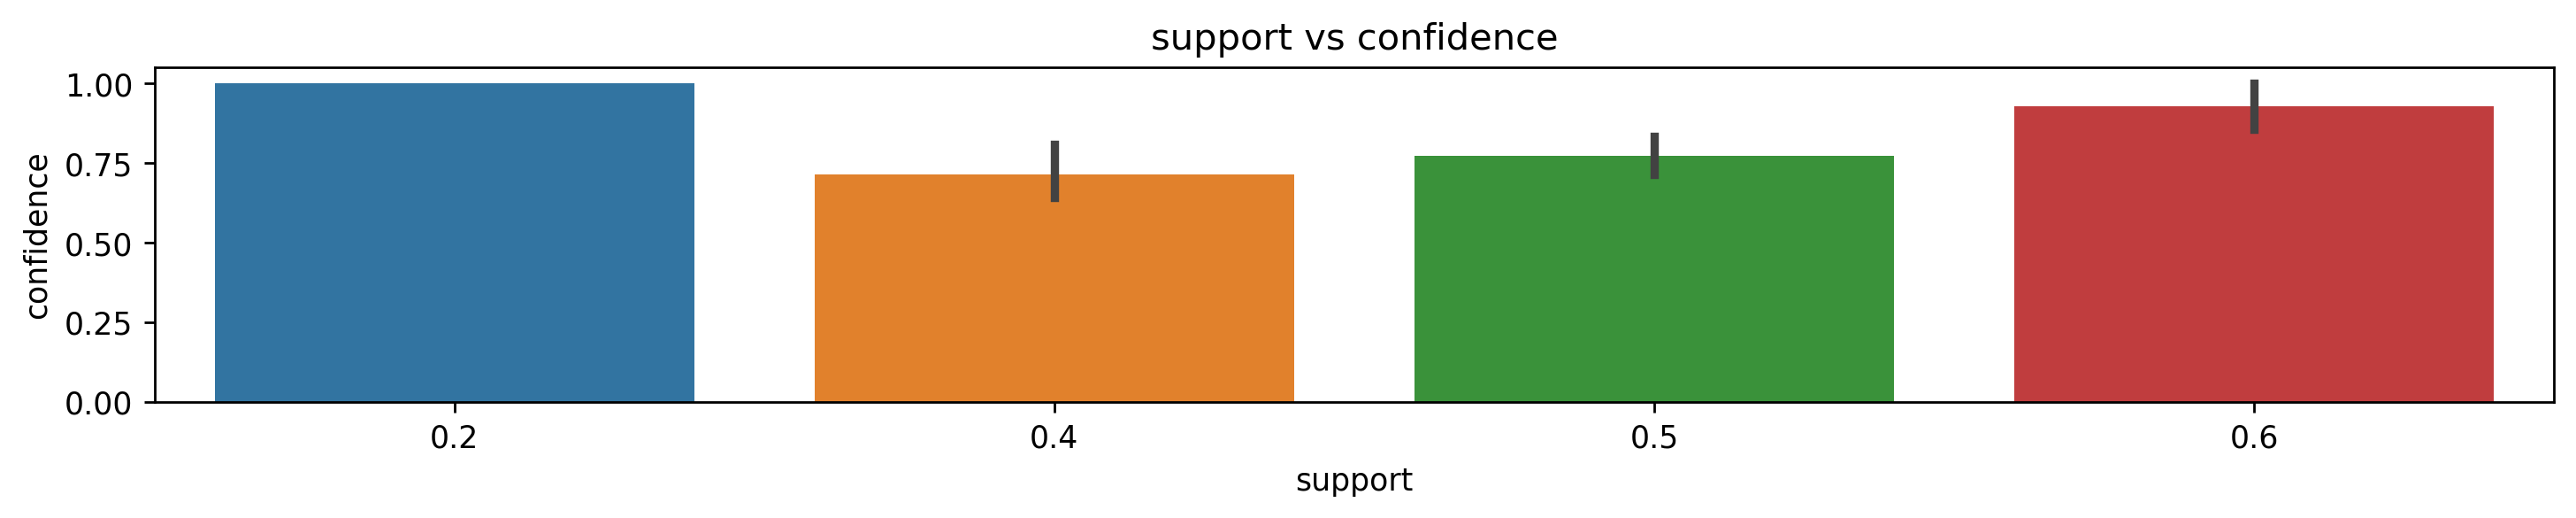

None


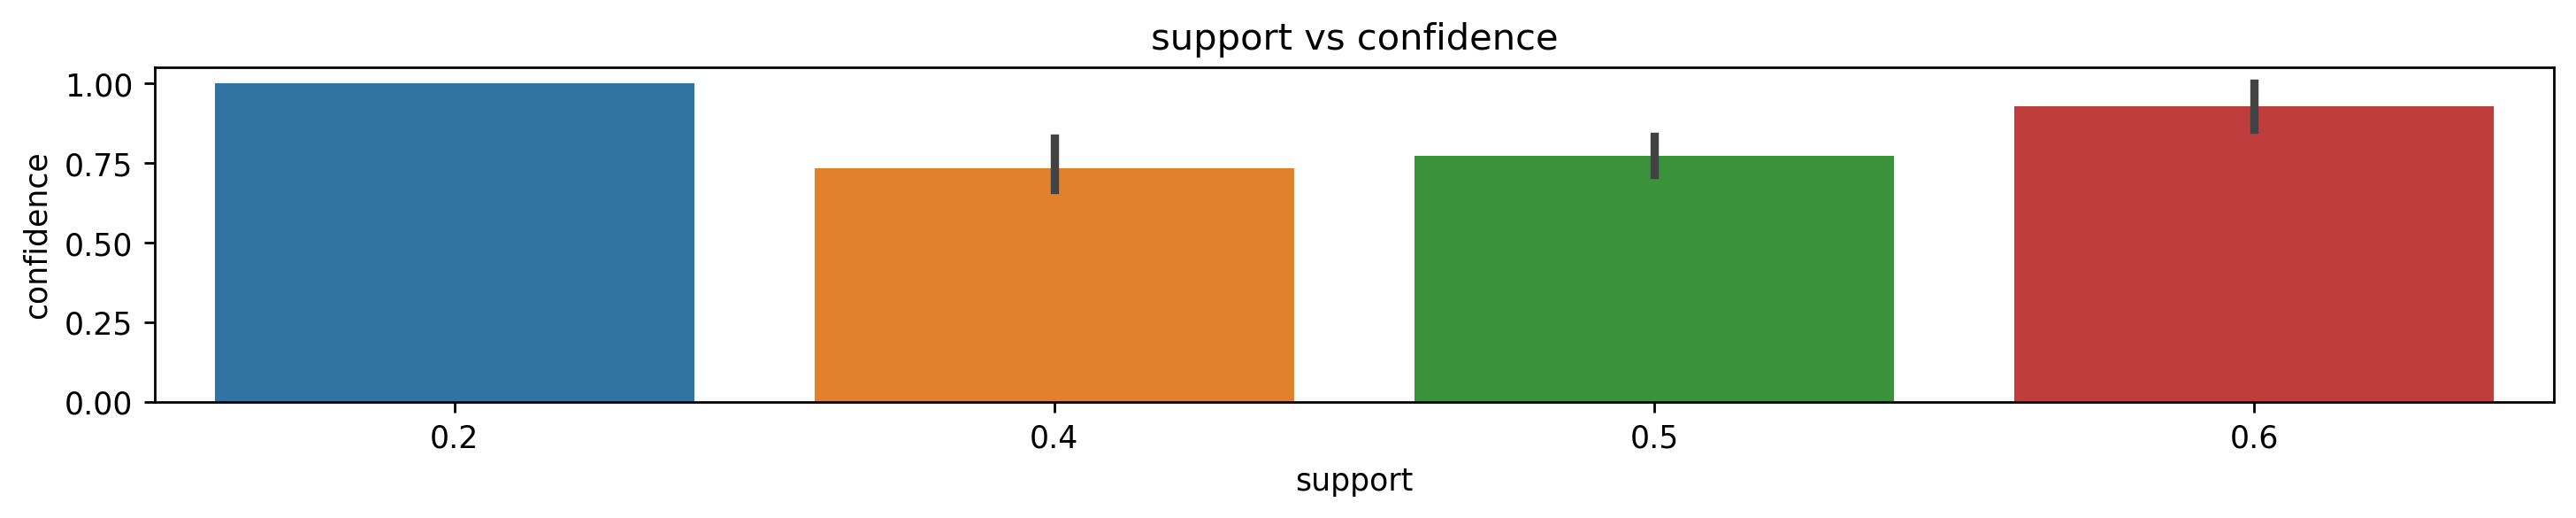

None


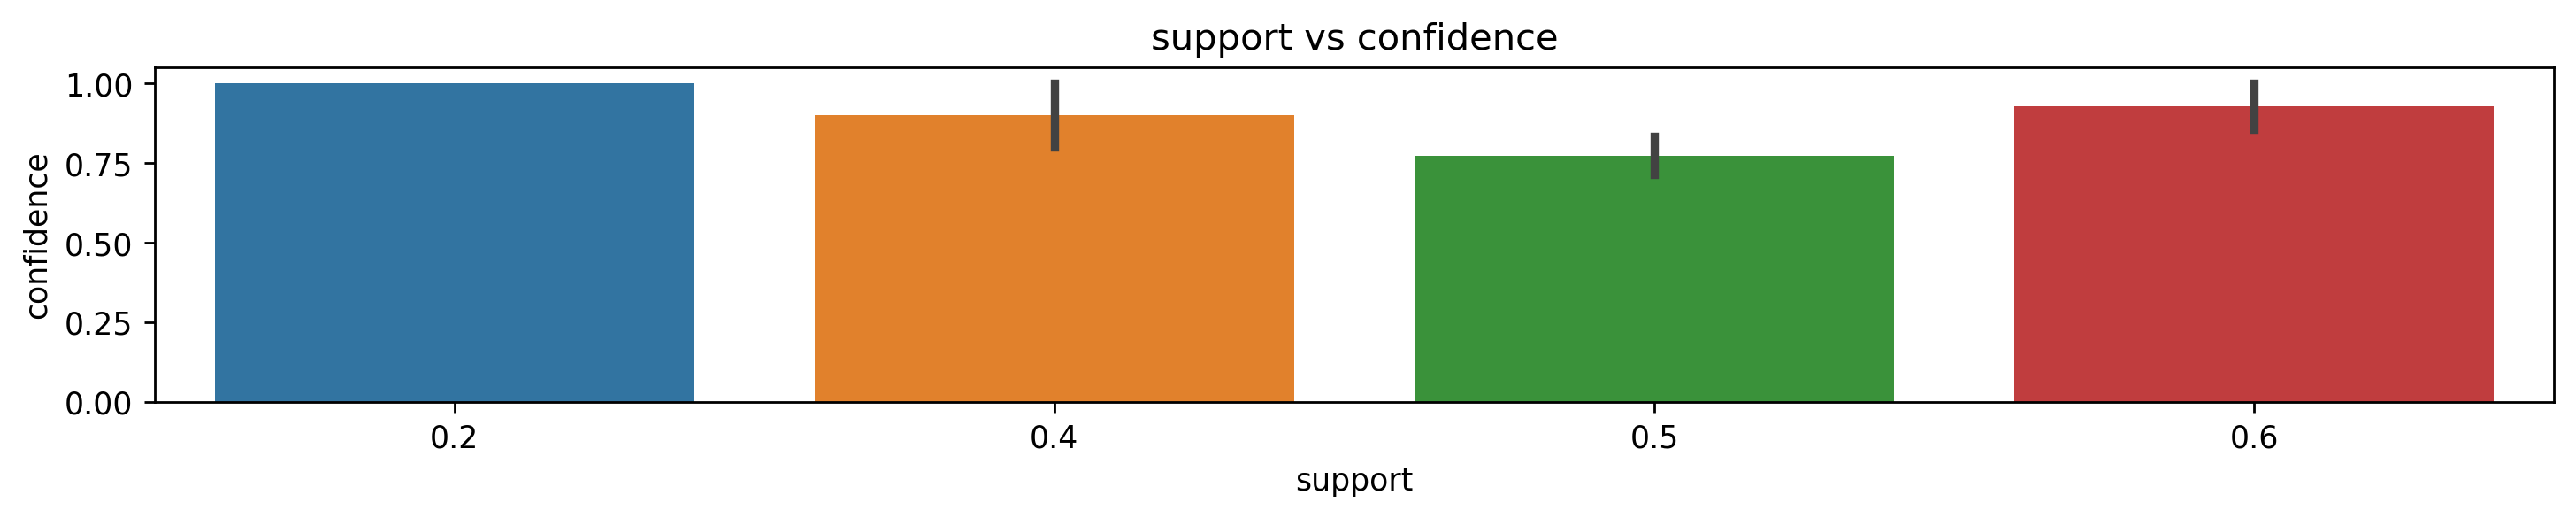

None


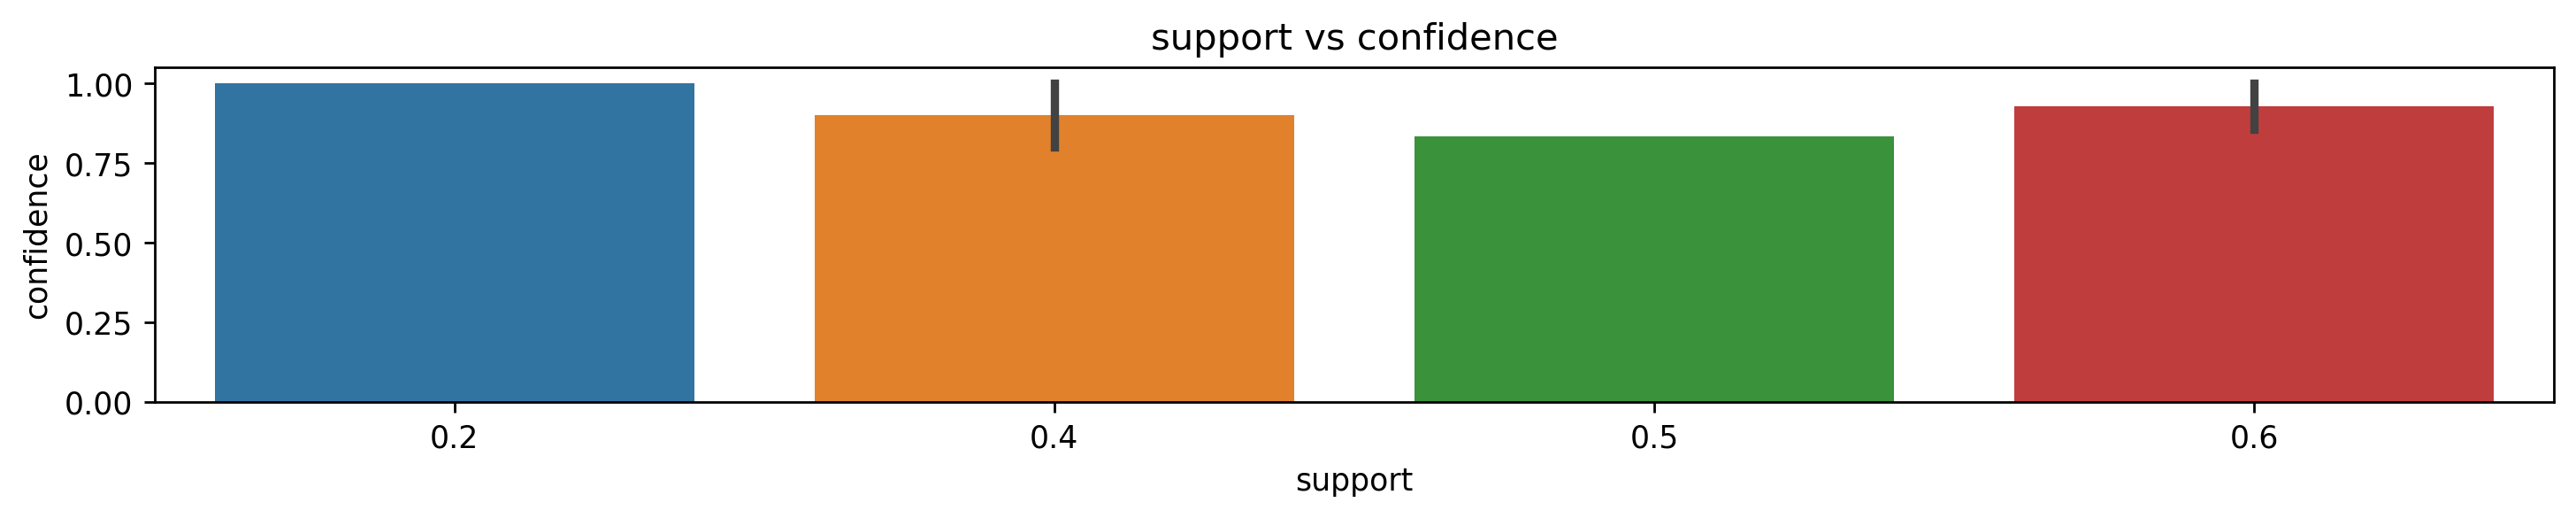

None


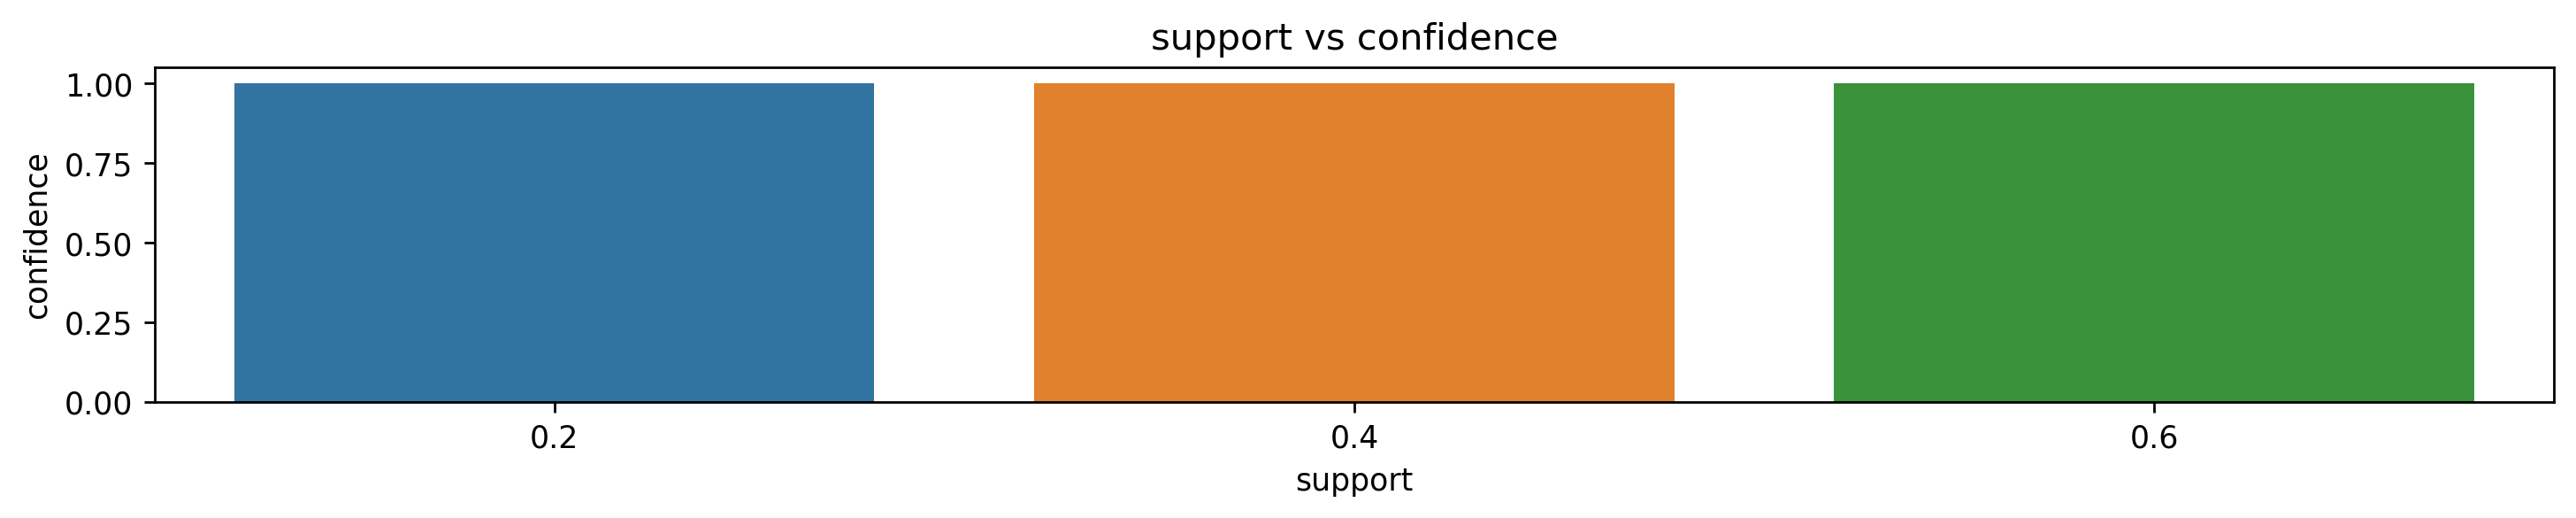

None


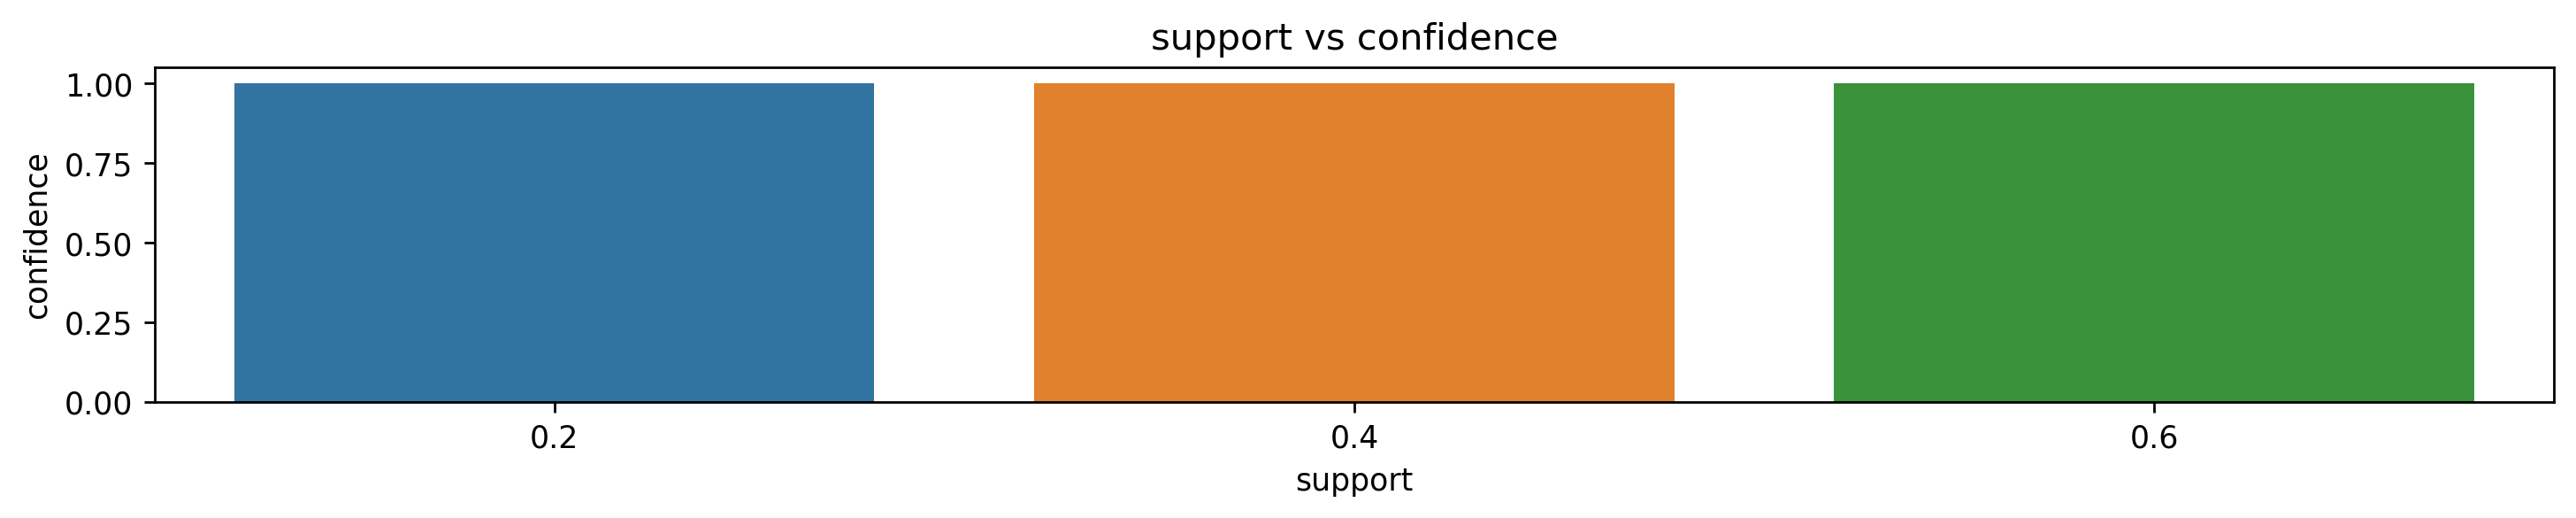

None


In [54]:
# Barplot for confidence vs support
lent=0,1,2,3,4,5,6,7
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf1[i])
    plt.title("support vs confidence")
    print(plt.show())

#### By ploting bar graph we observe that when confidence is reach to 1 support have only 3 values the one with 0.5 is gone 

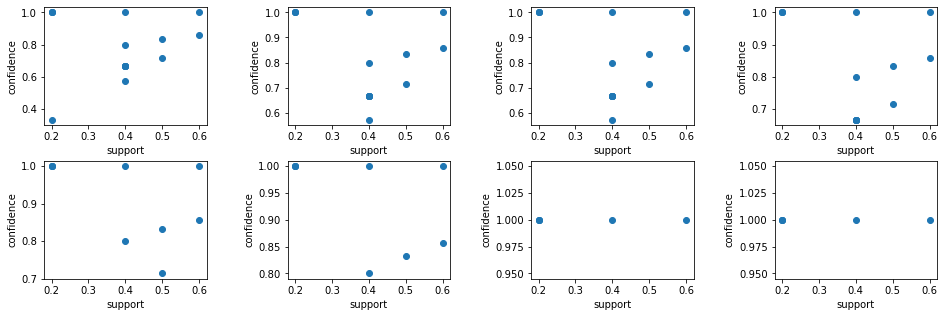

In [55]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes
ax1.scatter(conf1[0]['support'],conf1[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf1[1]['support'],conf1[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf1[2]['support'],conf1[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf1[3]['support'],conf1[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf1[4]['support'],conf1[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
ax6.scatter(conf1[5]['support'],conf1[5]['confidence']),ax6.set_xlabel('support'),ax6.set_ylabel('confidence')
ax7.scatter(conf1[6]['support'],conf1[6]['confidence']),ax7.set_xlabel('support'),ax7.set_ylabel('confidence')
ax8.scatter(conf1[7]['support'],conf1[7]['confidence']),ax8.set_xlabel('support'),ax8.set_ylabel('confidence')
plt.show()

### By ploting scatter plot we observe that most of the rules are lie on support 0.4 

(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

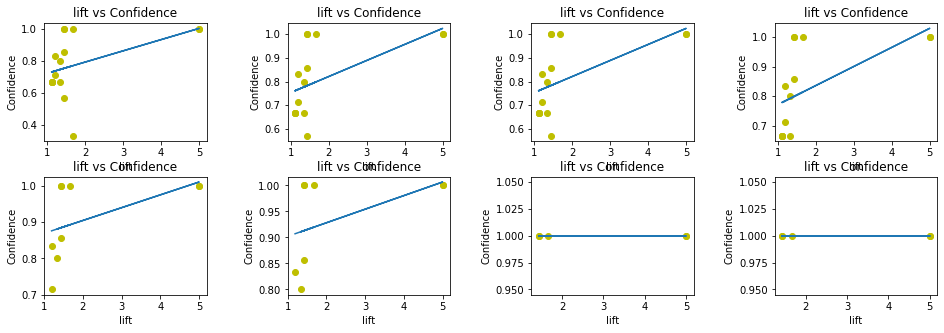

In [56]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes 
fit = np.polyfit(conf1[0]['lift'], conf1[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf1[0]['lift'], conf1[0]['confidence'], 'yo', conf1[0]['lift'],fit_fn(conf1[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf1[1]['lift'], conf1[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf1[1]['lift'], conf1[1]['confidence'], 'yo', conf1[1]['lift'],fit_fn(conf1[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf1[2]['lift'], conf1[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf1[2]['lift'], conf1[2]['confidence'], 'yo', conf1[2]['lift'],fit_fn(conf1[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf1[3]['lift'], conf1[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf1[3]['lift'], conf1[3]['confidence'], 'yo', conf1[3]['lift'],fit_fn(conf1[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf1[4]['lift'], conf1[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf1[4]['lift'], conf1[4]['confidence'], 'yo', conf1[4]['lift'],fit_fn(conf1[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')
fit = np.polyfit(conf1[5]['lift'], conf1[5]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax6.plot(conf1[5]['lift'], conf1[5]['confidence'], 'yo', conf1[5]['lift'],fit_fn(conf1[5]['lift']))
ax6.set_xlabel('lift'),ax6.set_ylabel('Confidence'),ax6.set_title('lift vs Confidence')
fit = np.polyfit(conf1[6]['lift'], conf1[6]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax7.plot(conf1[6]['lift'], conf1[6]['confidence'], 'yo', conf1[6]['lift'],fit_fn(conf1[6]['lift']))
ax7.set_xlabel('lift'),ax7.set_ylabel('Confidence'),ax7.set_title('lift vs Confidence')
fit = np.polyfit(conf1[7]['lift'], conf1[7]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax8.plot(conf1[7]['lift'], conf1[7]['confidence'], 'yo', conf1[7]['lift'],fit_fn(conf1[7]['lift']))
ax8.set_xlabel('lift'),ax8.set_ylabel('Confidence'),ax8.set_title('lift vs Confidence')

In [57]:
# finding support and length for itemsets with minimum support of 0.3 
frequent_itemsets2=apriori(data1,min_support=0.3,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Sixth Sense, Gladiator, Patriot)",3


### At minimum support of 0.3 we obtained 3-item itemset

In [58]:
# Finding confidence for rules obtained with minimum support of 0.3
conf2=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules2 = association_rules(frequent_itemsets2,metric='confidence', min_threshold=n)
    rules2.sort_values('lift',ascending=False)
    lift=rules2[rules2.lift>=1]
    print('No. of rules with confidence ',n,'is',rules2['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf2.append(rules2)

No. of rules with confidence  0.3 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.4 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.5 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.6 is 11 and no. of lift for those rules with ratio>=1 is 11
No. of rules with confidence  0.7 is 6 and no. of lift for those rules with ratio>=1 is 6
No. of rules with confidence  0.8 is 5 and no. of lift for those rules with ratio>=1 is 5
No. of rules with confidence  0.9 is 2 and no. of lift for those rules with ratio>=1 is 2
No. of rules with confidence  1 is 2 and no. of lift for those rules with ratio>=1 is 2


#### By applying different confidence on minimum support 0.1 we find that rules for confidence 0.3,0.4 and 0.5 are same also rules for confident 0.9 and 1 are same and when we set lift ratio >=1 we find that rules are same as confidence.

### Visualization of obtained rules

In [1]:
# Barplot for confidence vs support
lent=0,1,2,3,4,5,6,7
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf2[i])
    plt.title("support vs confidence")
    print(plt.show())

NameError: name 'plt' is not defined

#### By ploting bar graph we observe that when confidence is reach to 1 support have only 2 values the one with 0.5 is gone 

In [2]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes
ax1.scatter(conf2[0]['support'],conf2[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf2[1]['support'],conf2[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf2[2]['support'],conf2[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf2[3]['support'],conf2[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf2[4]['support'],conf2[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
ax6.scatter(conf2[5]['support'],conf2[5]['confidence']),ax6.set_xlabel('support'),ax6.set_ylabel('confidence')
ax7.scatter(conf2[6]['support'],conf2[6]['confidence']),ax7.set_xlabel('support'),ax7.set_ylabel('confidence')
ax8.scatter(conf2[7]['support'],conf2[7]['confidence']),ax8.set_xlabel('support'),ax8.set_ylabel('confidence')
plt.show()

NameError: name 'plt' is not defined

### By ploting scatter plot we observe that most of the rules are lie on support 0.4 

(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

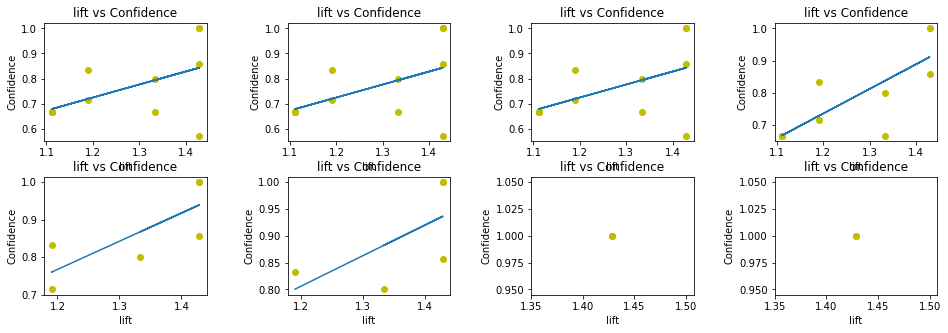

In [61]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes 
fit = np.polyfit(conf2[0]['lift'], conf2[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf2[0]['lift'], conf2[0]['confidence'], 'yo', conf2[0]['lift'],fit_fn(conf2[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf2[1]['lift'], conf2[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf2[1]['lift'], conf2[1]['confidence'], 'yo', conf2[1]['lift'],fit_fn(conf2[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf2[2]['lift'], conf2[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf2[2]['lift'], conf2[2]['confidence'], 'yo', conf2[2]['lift'],fit_fn(conf2[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf2[3]['lift'], conf2[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf2[3]['lift'], conf2[3]['confidence'], 'yo', conf2[3]['lift'],fit_fn(conf2[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf2[4]['lift'], conf2[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf2[4]['lift'], conf2[4]['confidence'], 'yo', conf2[4]['lift'],fit_fn(conf2[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')
fit = np.polyfit(conf2[5]['lift'], conf2[5]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax6.plot(conf2[5]['lift'], conf2[5]['confidence'], 'yo', conf2[5]['lift'],fit_fn(conf2[5]['lift']))
ax6.set_xlabel('lift'),ax6.set_ylabel('Confidence'),ax6.set_title('lift vs Confidence')
fit = np.polyfit(conf2[6]['lift'], conf2[6]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax7.plot(conf2[6]['lift'], conf2[6]['confidence'], 'yo', conf2[6]['lift'],fit_fn(conf2[6]['lift']))
ax7.set_xlabel('lift'),ax7.set_ylabel('Confidence'),ax7.set_title('lift vs Confidence')
fit = np.polyfit(conf2[7]['lift'], conf2[7]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax8.plot(conf2[7]['lift'], conf2[7]['confidence'], 'yo', conf2[7]['lift'],fit_fn(conf2[7]['lift']))
ax8.set_xlabel('lift'),ax8.set_ylabel('Confidence'),ax8.set_title('lift vs Confidence')

In [62]:
# finding support and length for itemsets with minimum support of 0.4 
frequent_itemsets3=apriori(data1,min_support=0.4,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.5,"(Sixth Sense, Gladiator)",2
4,0.4,"(Sixth Sense, Patriot)",2
5,0.6,"(Gladiator, Patriot)",2
6,0.4,"(Sixth Sense, Gladiator, Patriot)",3


In [63]:
# Finding confidence for rules obtained with minimum support of 0.4
conf3=[]
confidence=0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
for n in confidence:
    rules3 = association_rules(frequent_itemsets3,metric='confidence', min_threshold=n)
    rules3.sort_values('lift',ascending=False)
    lift=rules3[rules3.lift>=1]
    print('No. of rules with confidence ',n,'is',rules3['confidence'].count(),
          'and no. of lift for those rules with ratio>=1 is',lift['lift'].count())
    conf3.append(rules3)

No. of rules with confidence  0.3 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.4 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.5 is 12 and no. of lift for those rules with ratio>=1 is 12
No. of rules with confidence  0.6 is 11 and no. of lift for those rules with ratio>=1 is 11
No. of rules with confidence  0.7 is 6 and no. of lift for those rules with ratio>=1 is 6
No. of rules with confidence  0.8 is 5 and no. of lift for those rules with ratio>=1 is 5
No. of rules with confidence  0.9 is 2 and no. of lift for those rules with ratio>=1 is 2
No. of rules with confidence  1 is 2 and no. of lift for those rules with ratio>=1 is 2


#### By applying different confidence on minimum support 0.1 we find that rules for confidence 0.3,0.4 and 0.5 are same also rules for confident 0.9 and 1 are same and when we set lift ratio >=1 we find that rules are same as confidence.

### Visualization of obtained rules

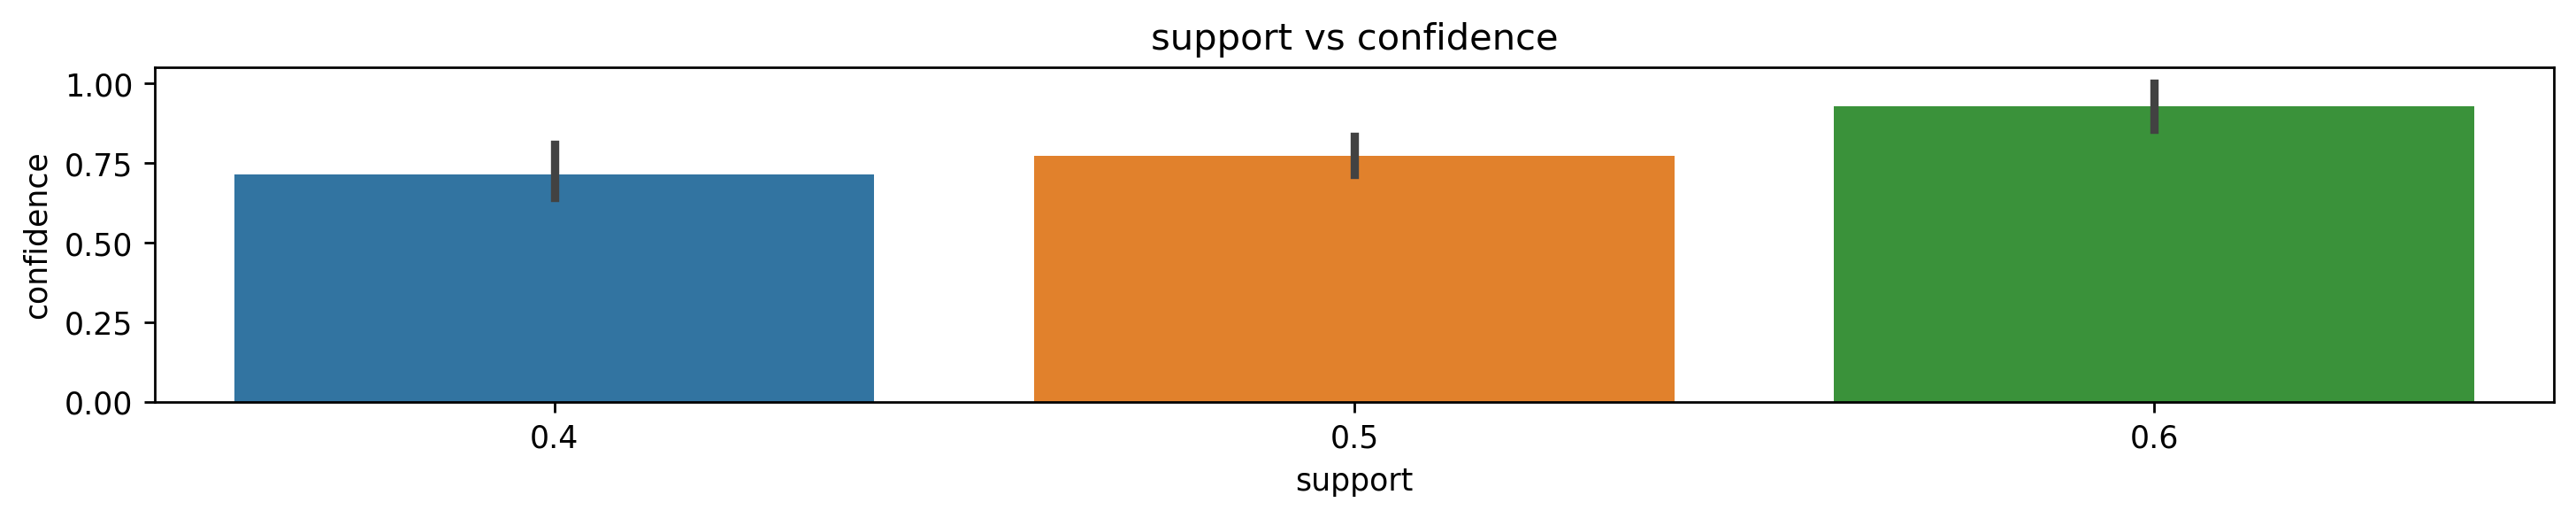

None


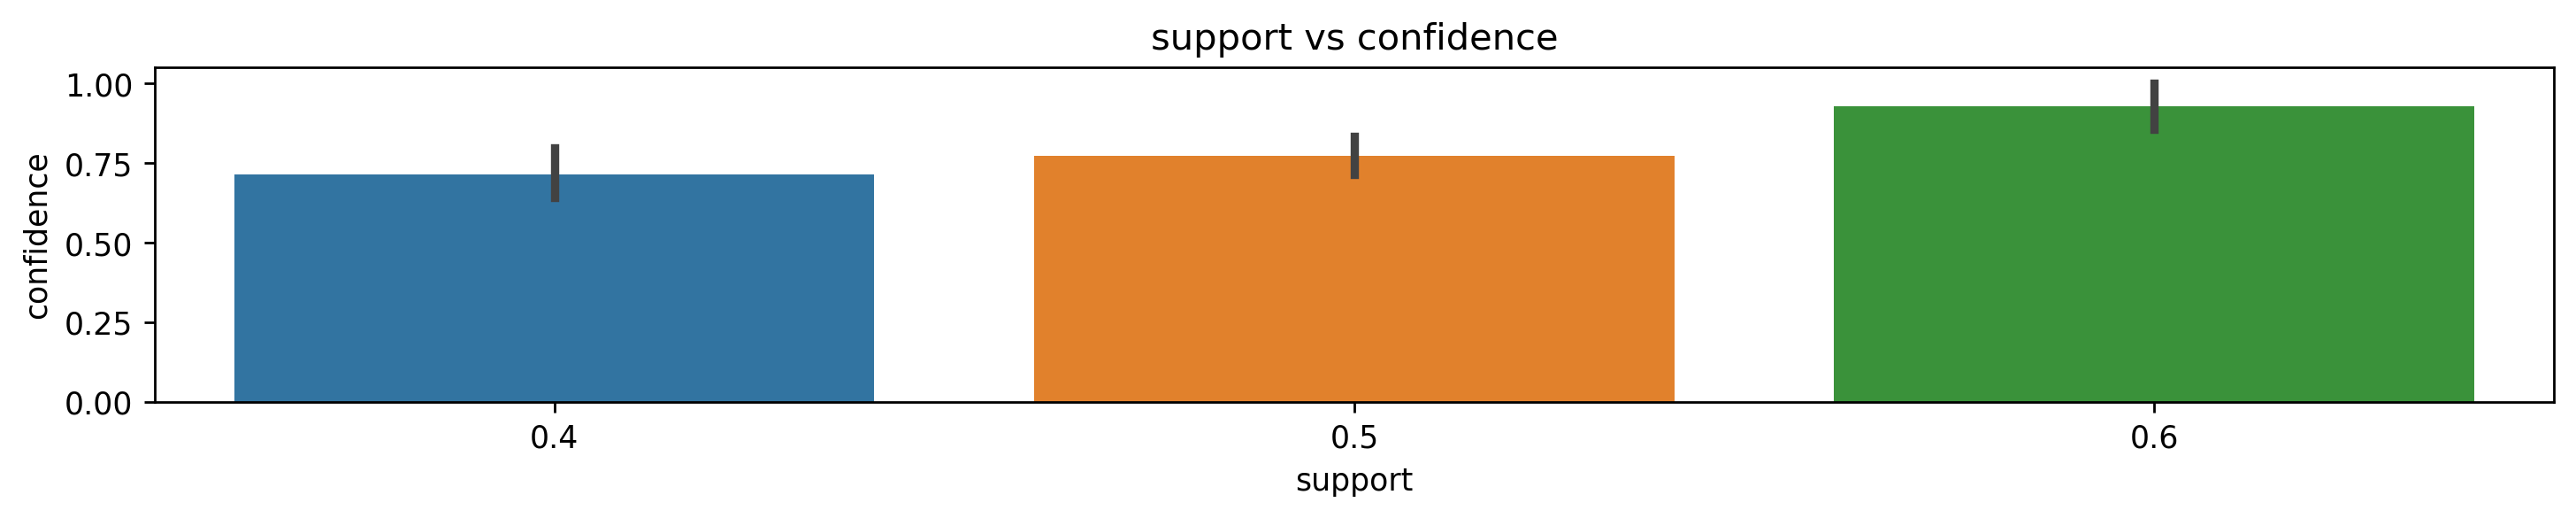

None


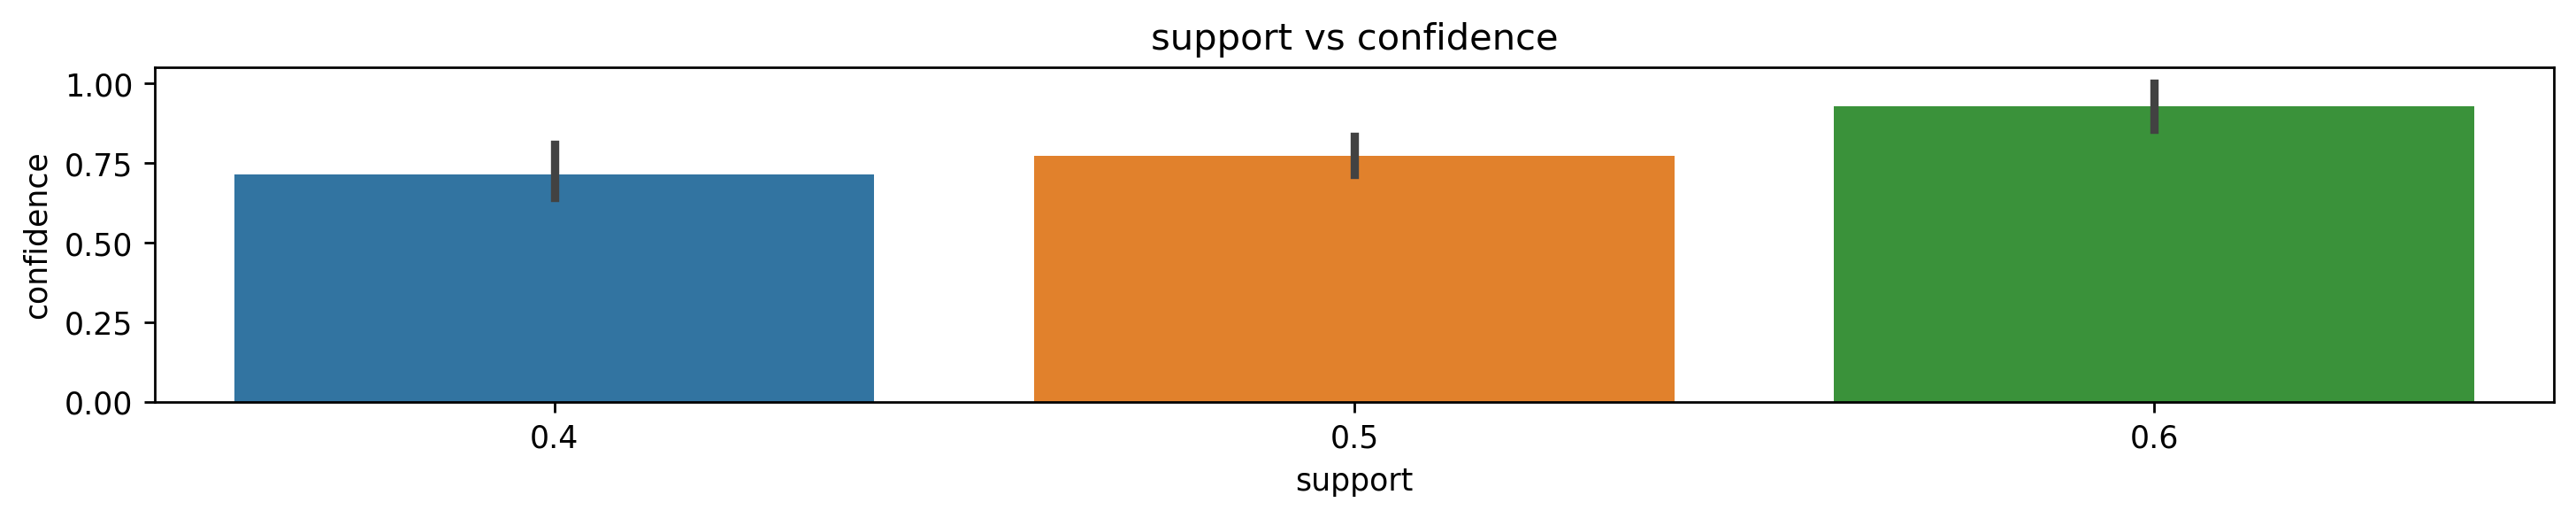

None


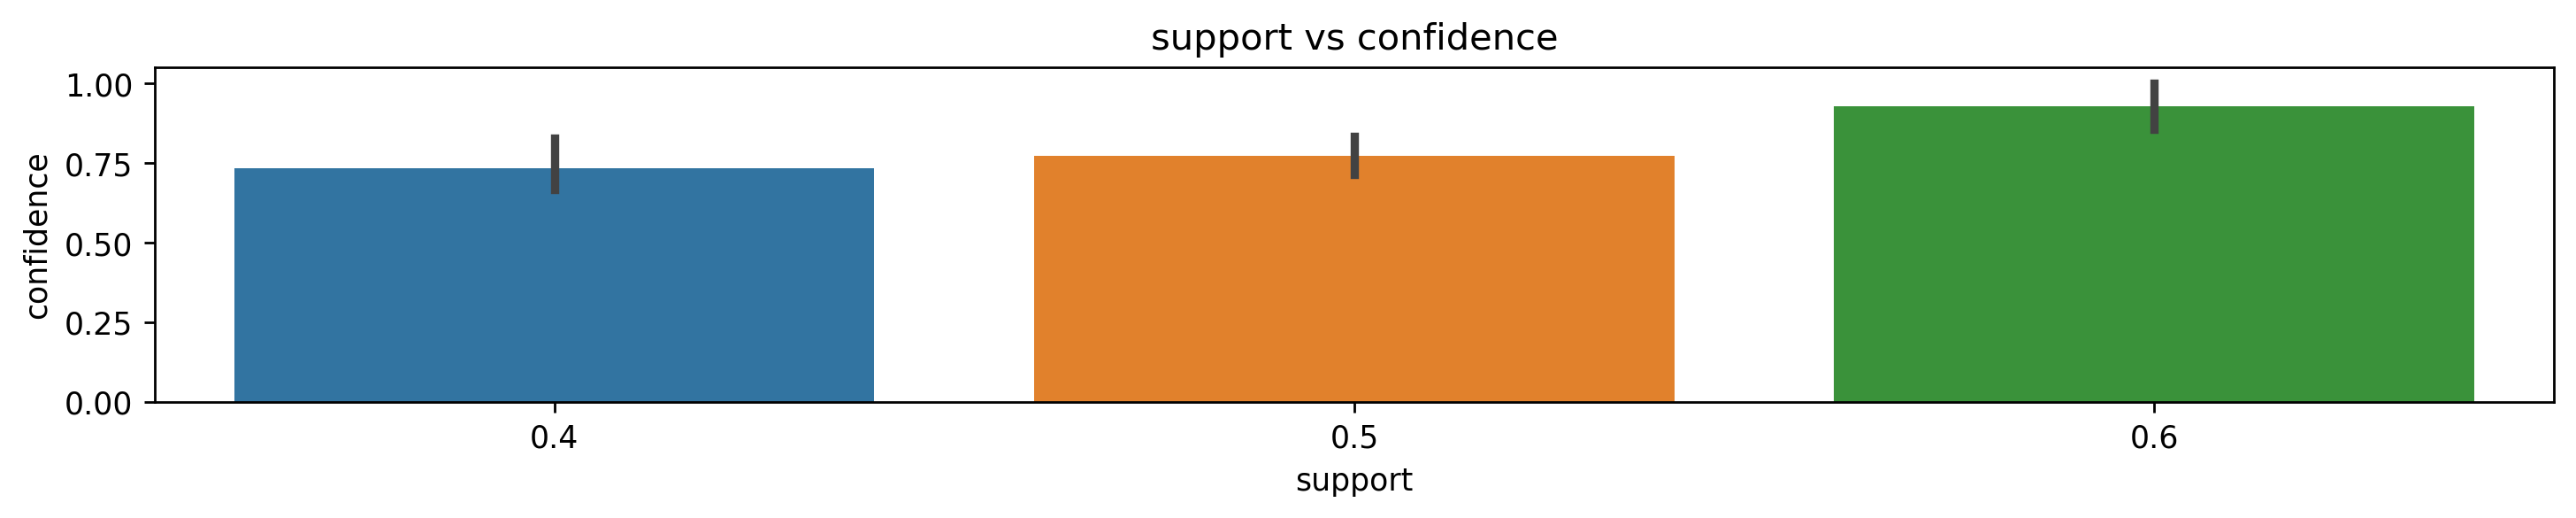

None


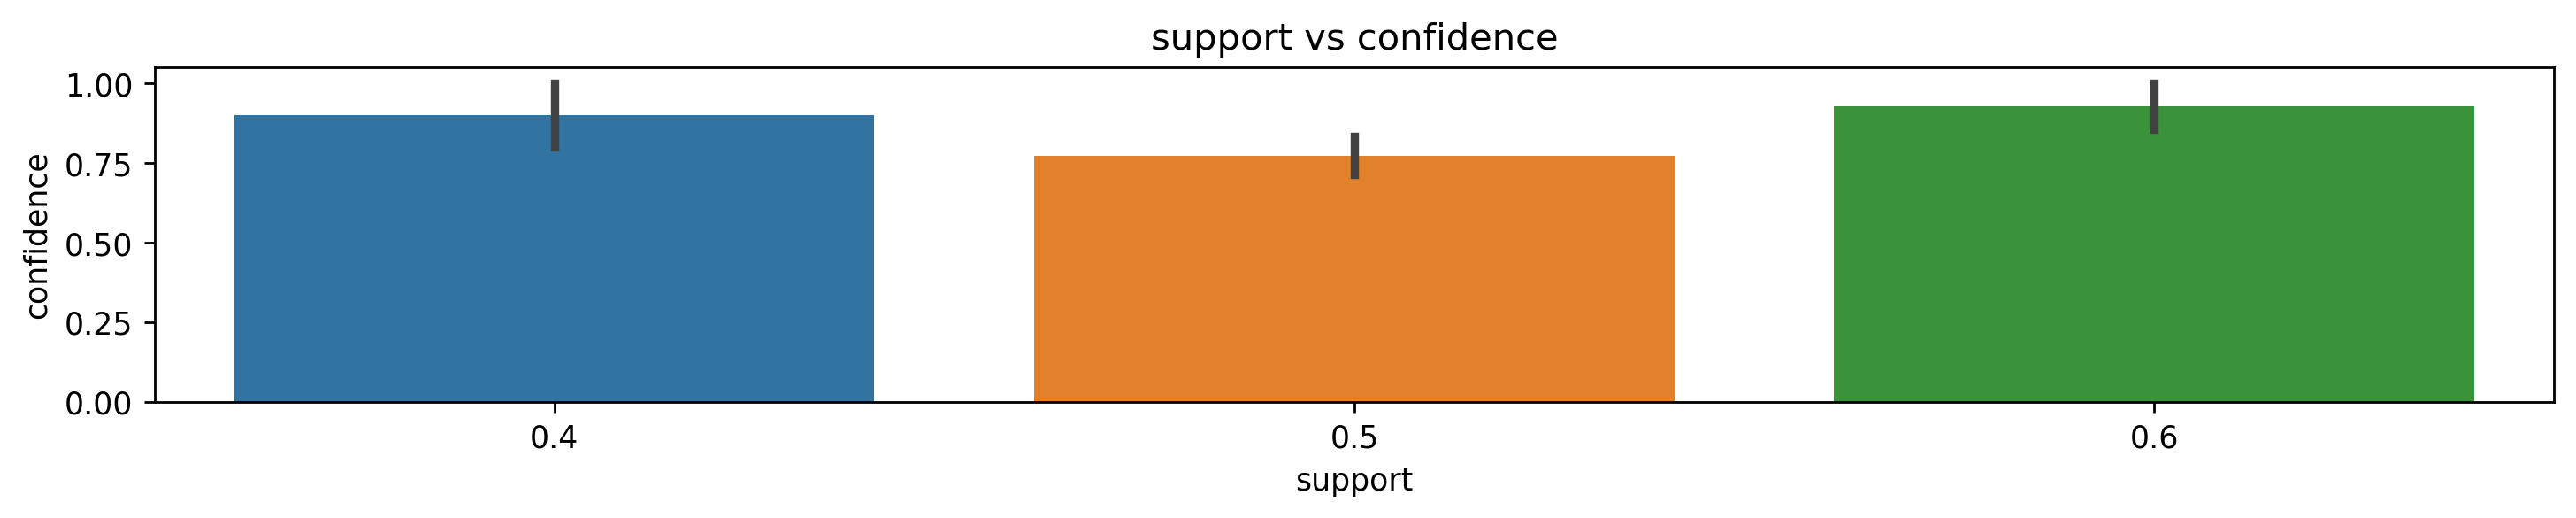

None


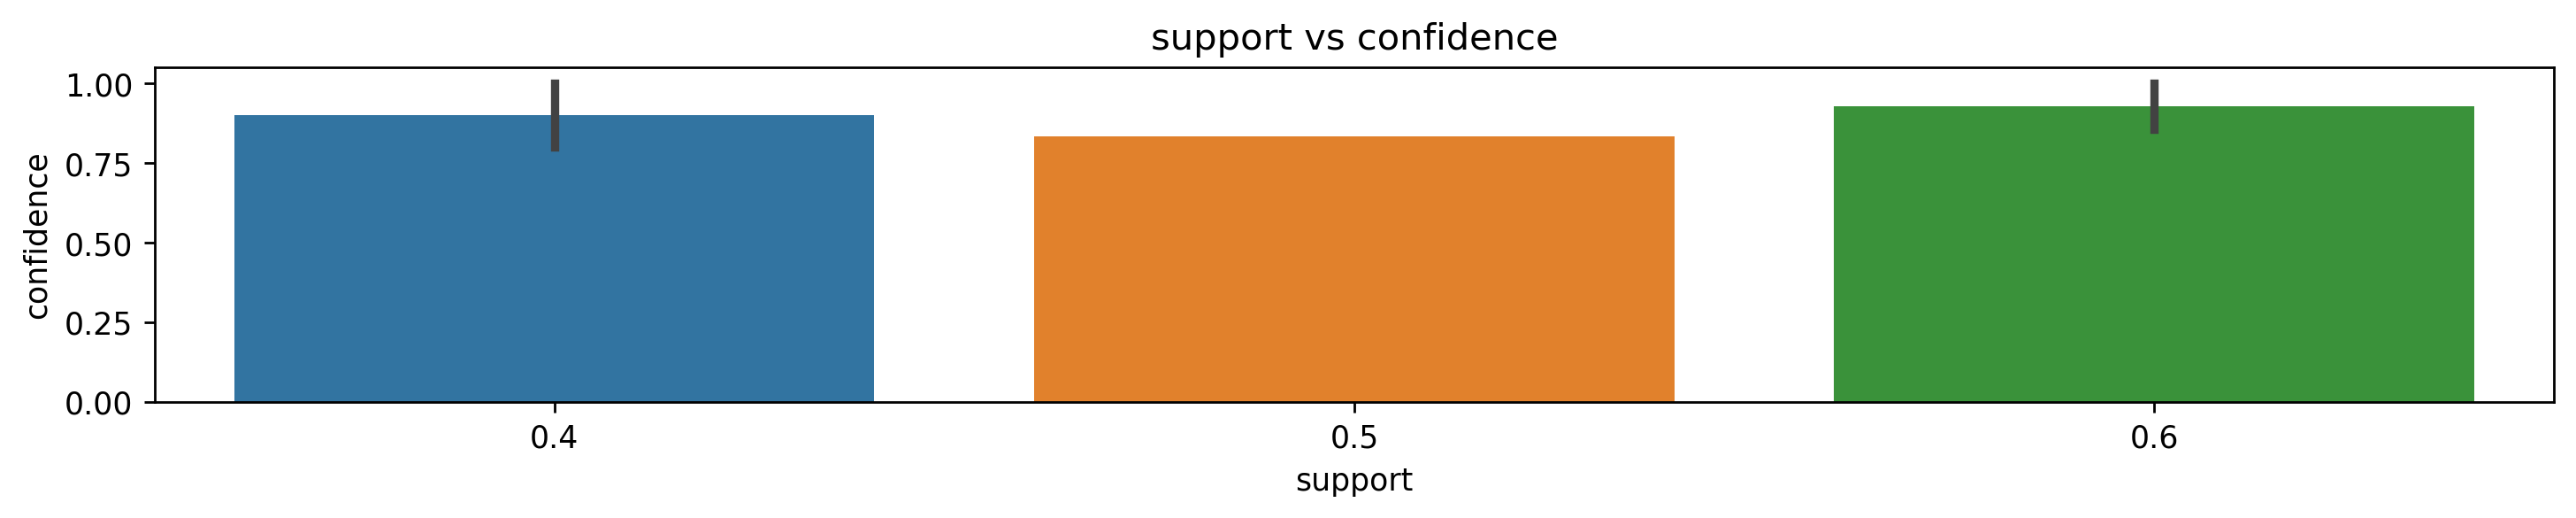

None


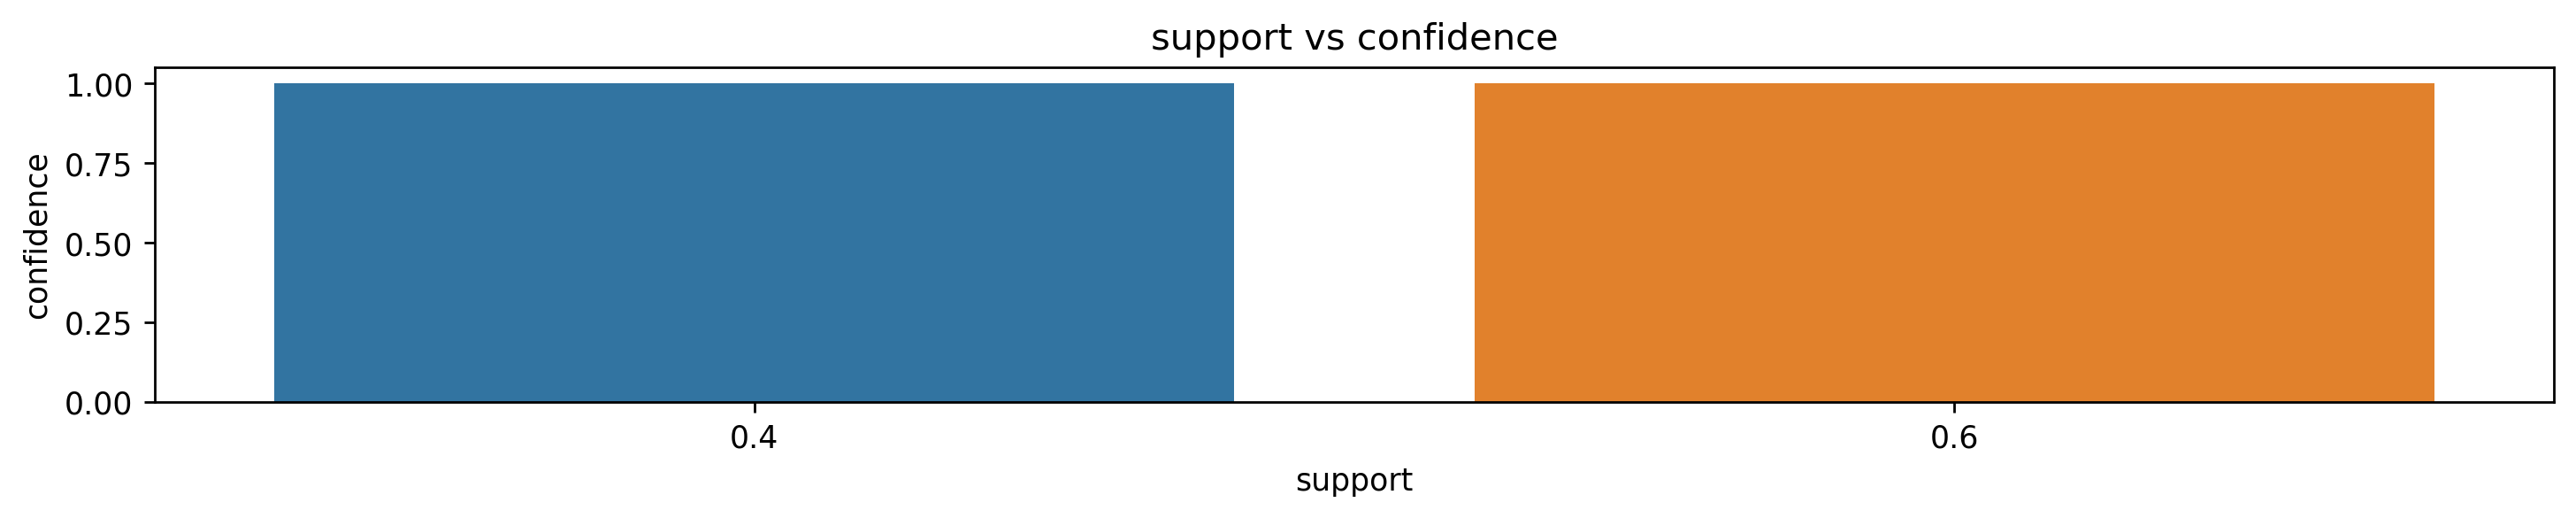

None


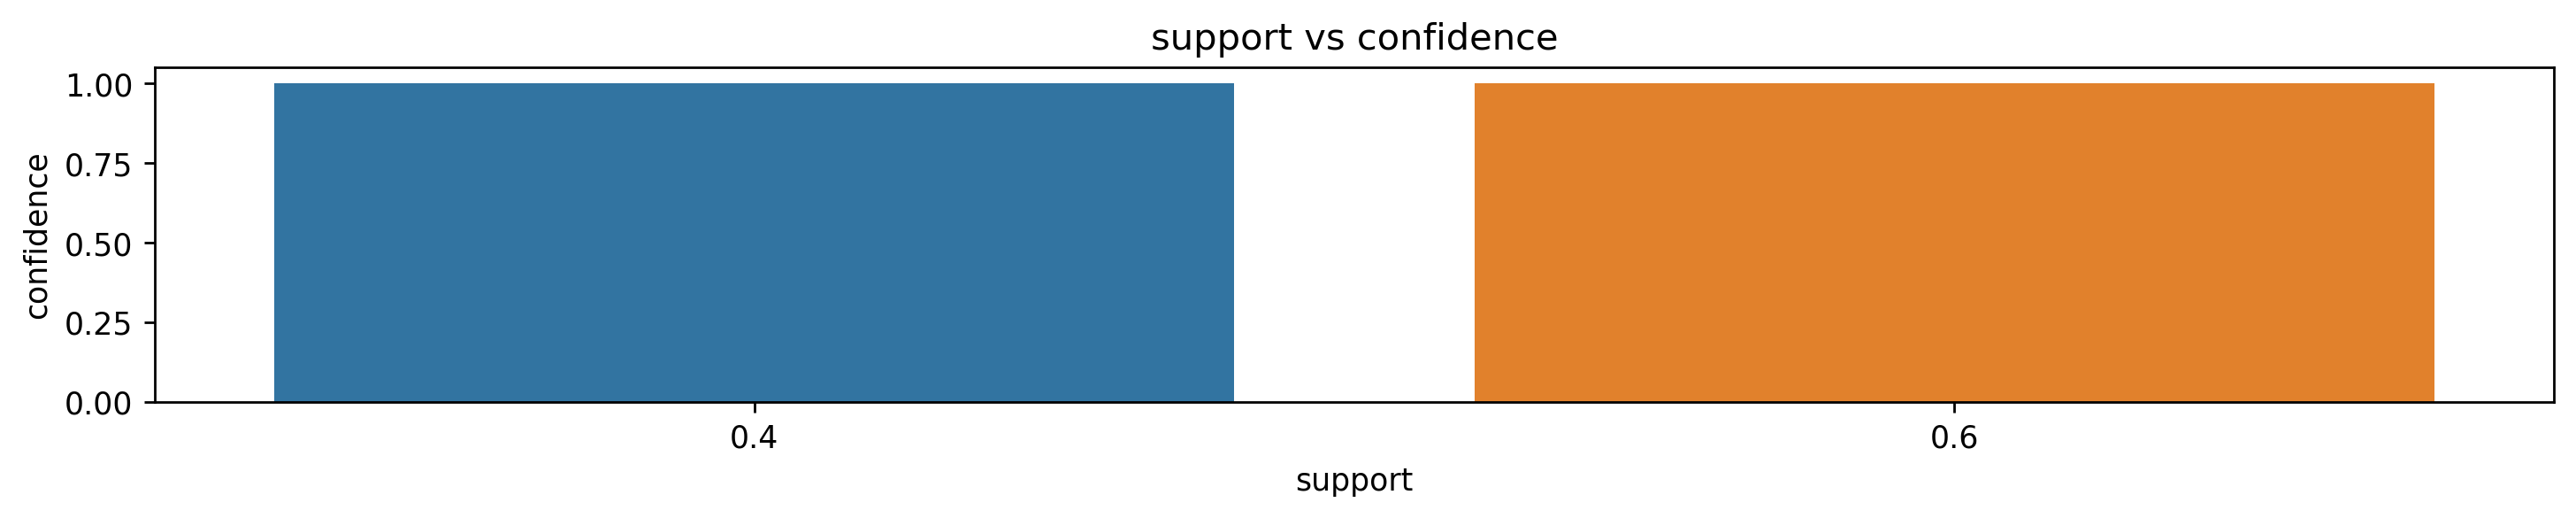

None


In [64]:
# Barplot for confidence vs support
lent=0,1,2,3,4,5,6,7
for i in lent:
    plt.figure(figsize=(14,2),dpi=250)
    sns.barplot("support","confidence",data=conf3[i])
    plt.title("support vs confidence")
    print(plt.show())

#### By ploting bar graph we observe that when confidence is reach to 1 support have only 2 values the one with 0.5 is gone 

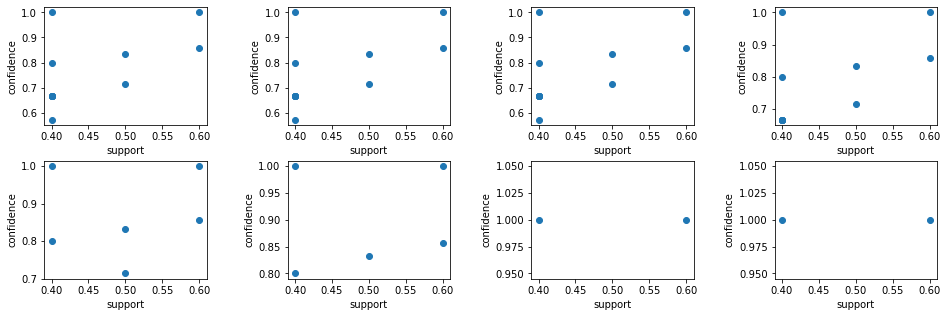

In [65]:
#scatter plot for visualization of relation between confidence and support
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes
ax1.scatter(conf3[0]['support'],conf3[0]['confidence']),ax1.set_xlabel('support'),ax1.set_ylabel('confidence')
ax2.scatter(conf3[1]['support'],conf3[1]['confidence']),ax2.set_xlabel('support'),ax2.set_ylabel('confidence')
ax3.scatter(conf3[2]['support'],conf3[2]['confidence']),ax3.set_xlabel('support'),ax3.set_ylabel('confidence')
ax4.scatter(conf3[3]['support'],conf3[3]['confidence']),ax4.set_xlabel('support'),ax4.set_ylabel('confidence')
ax5.scatter(conf3[4]['support'],conf3[4]['confidence']),ax5.set_xlabel('support'),ax5.set_ylabel('confidence')
ax6.scatter(conf3[5]['support'],conf3[5]['confidence']),ax6.set_xlabel('support'),ax6.set_ylabel('confidence')
ax7.scatter(conf3[6]['support'],conf3[6]['confidence']),ax7.set_xlabel('support'),ax7.set_ylabel('confidence')
ax8.scatter(conf3[7]['support'],conf3[7]['confidence']),ax8.set_xlabel('support'),ax8.set_ylabel('confidence')
plt.show()

### By ploting scatter plot we observe that most of the rules are lie on support 0.4 

(Text(0.5, 0, 'lift'),
 Text(0, 0.5, 'Confidence'),
 Text(0.5, 1.0, 'lift vs Confidence'))

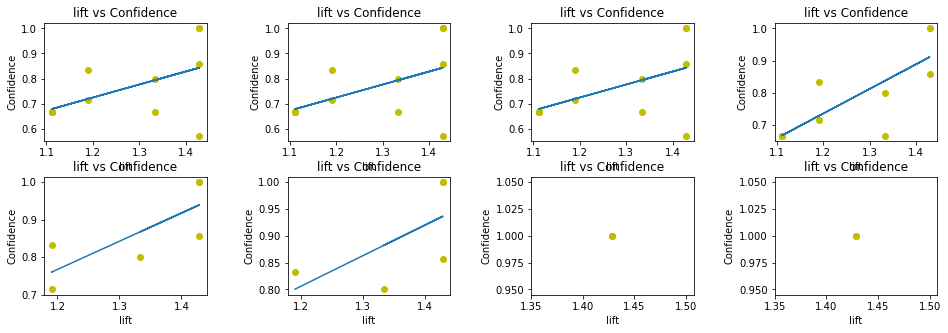

In [66]:
# polt of relatiob between confidence and lift
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8) = axes 
fit = np.polyfit(conf3[0]['lift'], conf3[0]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax1.plot(conf3[0]['lift'], conf3[0]['confidence'], 'yo', conf3[0]['lift'],fit_fn(conf3[0]['lift']))
ax1.set_xlabel('lift'),ax1.set_ylabel('Confidence'),ax1.set_title('lift vs Confidence')
fit = np.polyfit(conf3[1]['lift'], conf3[1]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax2.plot(conf3[1]['lift'], conf3[1]['confidence'], 'yo', conf3[1]['lift'],fit_fn(conf3[1]['lift']))
ax2.set_xlabel('lift'),ax2.set_ylabel('Confidence'),ax2.set_title('lift vs Confidence')
fit = np.polyfit(conf3[2]['lift'], conf3[2]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax3.plot(conf3[2]['lift'], conf3[2]['confidence'], 'yo', conf3[2]['lift'],fit_fn(conf3[2]['lift']))
ax3.set_xlabel('lift'),ax3.set_ylabel('Confidence'),ax3.set_title('lift vs Confidence')
fit = np.polyfit(conf3[3]['lift'], conf3[3]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax4.plot(conf3[3]['lift'], conf3[3]['confidence'], 'yo', conf3[3]['lift'],fit_fn(conf3[3]['lift']))
ax4.set_xlabel('lift'),ax4.set_ylabel('Confidence'),ax4.set_title('lift vs Confidence')
fit = np.polyfit(conf3[4]['lift'], conf3[4]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax5.plot(conf3[4]['lift'], conf3[4]['confidence'], 'yo', conf3[4]['lift'],fit_fn(conf3[4]['lift']))
ax5.set_xlabel('lift'),ax5.set_ylabel('Confidence'),ax5.set_title('lift vs Confidence')
fit = np.polyfit(conf3[5]['lift'], conf3[5]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax6.plot(conf3[5]['lift'], conf3[5]['confidence'], 'yo', conf3[5]['lift'],fit_fn(conf3[5]['lift']))
ax6.set_xlabel('lift'),ax6.set_ylabel('Confidence'),ax6.set_title('lift vs Confidence')
fit = np.polyfit(conf3[6]['lift'], conf3[6]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax7.plot(conf3[6]['lift'], conf3[6]['confidence'], 'yo', conf3[6]['lift'],fit_fn(conf3[6]['lift']))
ax7.set_xlabel('lift'),ax7.set_ylabel('Confidence'),ax7.set_title('lift vs Confidence')
fit = np.polyfit(conf3[7]['lift'], conf3[7]['confidence'], 1)
fit_fn = np.poly1d(fit)
ax8.plot(conf3[7]['lift'], conf3[7]['confidence'], 'yo', conf3[7]['lift'],fit_fn(conf3[7]['lift']))
ax8.set_xlabel('lift'),ax8.set_ylabel('Confidence'),ax8.set_title('lift vs Confidence')

#### Byploting support and confidence we observe that when confidence increase rules are decrease.
#### When we plot bargraph we notice that in every iteration of minimum support when confidence is 1 support value of 0.5 is gone.
#### when we plot scatter plot we notice that most of the rules lie on the support value 0.4